# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.


<hr style="border:1px solid gray"> </hr>

# Primera mirada a nuestros datos

El objetivo principal de este notebook es reproducir el flujo de trabajo de un Data Scientist cuando se enfrenta a una problemática real. Por eso consta de tres partes:

**1. Pensando como un Data Scientist:**

 * Indagaremos sobre la información que nos serviría para identificar nuestra variable de respuesta (precio). Discutiremos qué tipo de relación podría existir entre estas variables potenciales.
    
**2. Análisis exploratorio de datos:**

  * Vamos a ver cómo se relacionan entre sí las variables de nuestro dataset, para eso utilizaremos análisis gráficos,
      correlaciones y operaciones que nos permitan identificar la distribución "correcta" de cada una de ellas.
      
**3. Modelo de Machine learning para predecir el precio de los bienes:**
  Introduciremos tres metodologías que nos ayudarán a comparar el rendimiento de nuestros modelos:
  * Modelo de regresión lineal: será nuestro modelo benchmark, el modelo a partir del cual haremos la optimización de los otros dos modelos para definir si nuestra predicción es "mejor que el azar".
    
  * Modelo de vecinos más cercanos - KNN: con esta aproximación al problema, queremos ver si optimizando los hiperparámetros número de vecinos y tipo de distancia, logramos un mejor rendimiento para diferentes especificaciones del modelo (diferentes features).
    
  * Modelo de árbol de decisión - DT: con esta aproximación al problema, queremos ver si optimizando los hiperparámetros profundidad del árbol y criterio de split, logramos un mejor rendimiento para diferentes especificaciones del modelo (diferentes features).

**4. Elección del modelo:**

  * Conclusiones sobre cuales criterios se tuvieron en cuenta para escoger el modelo final, así como las limitaciones de la aproximación al problema con este modelo.

<hr style="border:1px solid gray"> </hr>

# 1. Pensando como un Data Scientist

### ¿Qué datos crees que te ayudarían a trabajar en el problema? ¿Por qué?

Los datos que me podrían ayudar a trabajar en el problema serían atributos como:
* Área
* Precio
* Antiguedad
* Distancia del inmueble a vías principales
* Tipo de propiedad (casa, apartamento, etc...)

Creo que estos datos se correlacionan de manera significativa con los precios de los inmuebles, por lo que se podrían esperar las siguientes relaciones:

* A mayor área, mayor precio
* A mayor antiguedad, menor precio
* A menor distancia del inmueble a vías principales, mayor su precio. Una hipótesis de porqué este podría ser el caso es que hay mayor acceso a zonas comerciales, lo que hace más valioso vivir cerca de estas zonas.
* Distintos tipos de propiedad ofrecen características diferentes de inmueble a los compradores (acabados, distribución de espacios, etc...) que hacen que algunos sean más valiosos que otros. Una casa podría ser más valiosa que un apartamento, todas las demás características de los bienes constantes.

<hr style="border:1px solid gray"> </hr>

# 2. Análisis Exploratorio de Datos

---

## Cargando el dataset de Properati

Vamos a usar el dataset de Properati, agencia inmobiliaria, de la que se puede obtener más información acá (insertar link)

El dataset se encuentra disponible como un archivo CSV (Comma-Separated Values) y vamos a usar pandas para leerlo.



In [ ]:
import pandas as pd
propiedades_df = pd.read_csv("/content/drive/MyDrive/Acamica/Sprint 1 - Data Science - Acamica/Clase8/Proyecto/DS_Proyecto_01_Datos_Properati.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


El objetivo último es, a través de estos datos, predecir el precio de un bien a partir de algunos *features* o características relacionadas como `property_type`, `bathrooms`, `surface_covered` y `surface_total`. 

---

## Los features del dataset

Los datos se encuentran almacenados en un `DataFrame` de pandas. Un Dataframe es un tipo de estructura de datos de 2 dimensiones (filas y columnas). A este tipo de datos también se le conoce como datos tabulares.

Cada fila representa una observación, a la que también se le conoce como instancia. 

Por otro lado, cada columna representa cierto tipo de información (numérica o catégorica) de cada una de estas instancias y se le llama *feature* o *atributo*. 

A continuación una descripción breve de su significado:

* **start_date**: fecha en la que se da de alta al anuncio
* **end_date**: fecha en la que se da de baja al anuncio
* **created_on**: fecha de creación del anuncio
* **lat**: latitud
* **lon**: longitud
* **l1**: País
* **l2**: zona del Gran Buenos Aires
* **l3**: Barrio
* **rooms**: # de habitaciones
* **bedrooms**: # de cuartos
* **bathrooms**: # de baños
* **surface_total**: superficie total del inmueble
* **surface_covered**: superficie cubierta por 
* **currency**: moneda en la que se cotiza el inmueble
* **title**: título del aviso
* **description**: descripción de la propiedad
* **property_type**: tipo de propiedad
* **operation_type**: tipo de operación

Veamos las primeras 5 instancias de nuestro dataset utilizando el método `head()` de los DataFrames:

In [ ]:
propiedades_df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.61,-58.38,Argentina,Capital Federal,San Cristobal,7.00,7.00,2.00,140.00,140.00,153000.00,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.62,-58.41,Argentina,Capital Federal,Boedo,2.00,1.00,2.00,70.00,58.00,159000.00,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.59,-58.43,Argentina,Capital Federal,Palermo,2.00,1.00,1.00,45.00,45.00,125000.00,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.58,-58.44,Argentina,Capital Federal,Palermo,2.00,1.00,1.00,85.00,50.00,295000.00,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.91,-57.94,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.00,1.00,1.00,50.00,35.00,40000.00,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


La variable **precio** es nuestro atributo objetivo, es decir, la variable que queremos predecir. Dado que la variable 
es continua, nuestro problema **corresponde a un problema de regresión**.

In [ ]:
propiedades_df[["price"]]

,price
0,153000.00
1,159000.00
2,125000.00
3,295000.00
4,40000.00
...,...
146655,165000.00
146656,130000.00
146657,73000.00
146658,68000.00


El dataset contiene tanto variables numéricas como categóricas- Las variables numéricas toman valores continuos, por ejemplo la variable `surface_covered` que hace referencia al área que ocupa el bien inmueble. Los datos categóricos pueden tener un número limitado de valores, por ejemplo, la variable `property_type`.

In [ ]:
propiedades_df["surface_covered"].dtype

dtype('float64')

In [ ]:
propiedades_df["property_type"].unique()

array(['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina',
       'Otro', 'Local comercial', 'Cochera', 'Depósito'], dtype=object)

También podemos ver el número de instancias y de atributos que tenemos en nuestro dataset:

In [ ]:
print(f"El dataset contiene {propiedades_df.shape[0]} instancias y {propiedades_df.shape[1]} columnas")

El dataset contiene 146660 instancias y 19 columnas


Y examinar cuantos valores faltantes hay en nuestro dataset

In [ ]:
nan_dict = {"Missing Values Percentage": propiedades_df.isnull().sum()/ len(propiedades_df), "# Missing Values": propiedades_df.isnull().sum()}
valores_faltantes_df = pd.DataFrame(nan_dict , index = propiedades_df.columns)
valores_faltantes_df.sort_values("Missing Values Percentage", inplace=True, ascending = False)
valores_faltantes_df["Missing Values Percentage"] = valores_faltantes_df["Missing Values Percentage"].astype(float).map("{:.2%}".format)
valores_faltantes_df

,Missing Values Percentage,# Missing Values
surface_covered,14.74%,21614
surface_total,14.00%,20527
lon,6.79%,9959
lat,6.77%,9925
bathrooms,4.06%,5957
start_date,0.00%,0
property_type,0.00%,0
description,0.00%,0
title,0.00%,0
currency,0.00%,0


Se puede observar que la mayor proporción de valores faltantes se encuentra en la variable `surface_covered` con un 14.74%, seguido por la variable `surface_total` con un 14%. 

## Distribución de las variables

Inspeccionar visualmente los datos nos puede dar nuevas perspectivas sobre los mismos. Además, podríamos encontrar peculiaridades o errores que pudieron surgir  durante la recolección de los datos.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

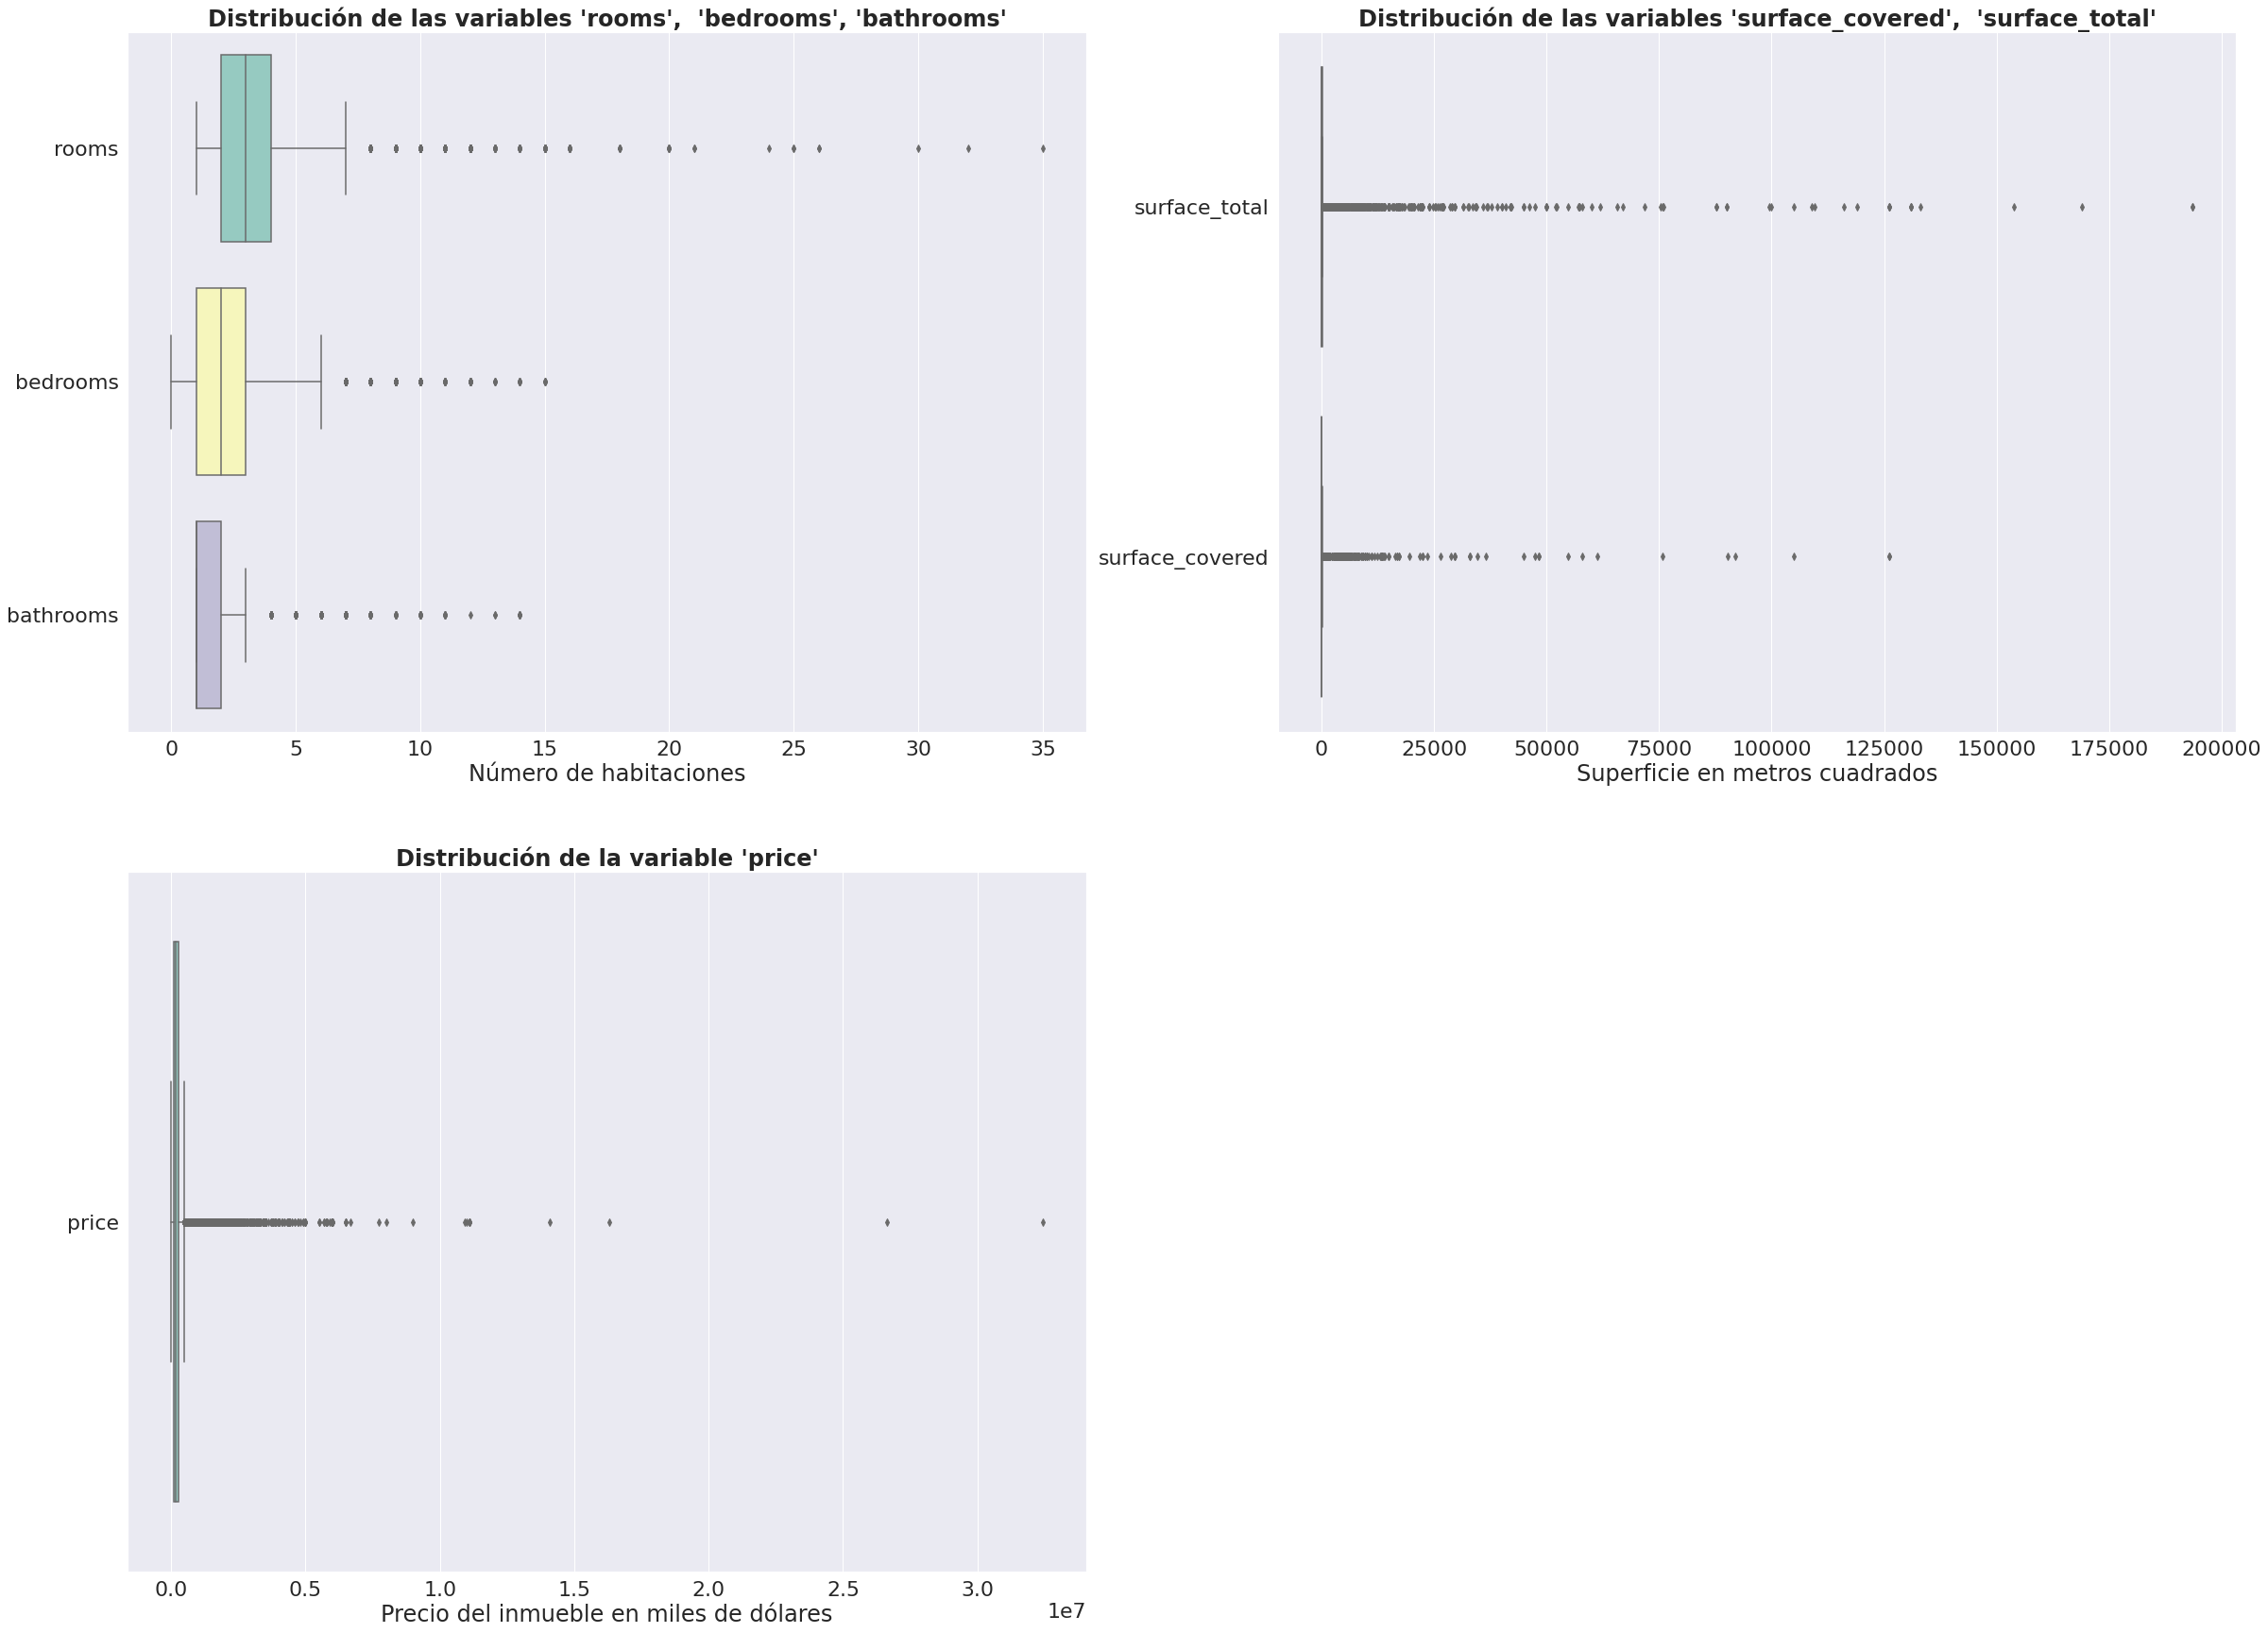

In [ ]:
sns.set(font_scale=2)
plt.figure(figsize = (40, 30))
plt.subplot(2, 2, 1)
plt.title("Distribución de las variables 'rooms',  'bedrooms', 'bathrooms'", fontweight= "semibold")
plt.xlabel("Número de habitaciones")
sns.boxplot(data = propiedades_df.drop(columns = ["lat", "lon", "price", "surface_total", "surface_covered"], axis = 1), palette="Set3", orient="h")

plt.subplot(2, 2, 2)
sns.boxplot(data = propiedades_df.drop(columns = ["lat", "lon", "price", "rooms", "bedrooms", "bathrooms"], axis = 1), palette="Set3", orient="h")
plt.title("Distribución de las variables 'surface_covered',  'surface_total'", fontweight= "semibold")
plt.xlabel("Superficie en metros cuadrados")

plt.subplot(2, 2, 3)
sns.boxplot(data = propiedades_df.drop(columns = ["lat", "lon", "rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered"]), palette="Set3", orient="h")
plt.title("Distribución de la variable 'price'", fontweight= "semibold")
plt.xlabel("Precio del inmueble en miles de dólares")

plt.show()

A partir de estos boxplots, podemos observar que hay observaciones (instancias) que no pertenecen a las distribuciones de las variables. Por esta razón, es necesario hacer una corrección (filtrar instancias) que nos permita tener en cuenta este hecho para observar la distribución *real* de las mismas.

Para las variables categóricas, podemos ver su distribución:

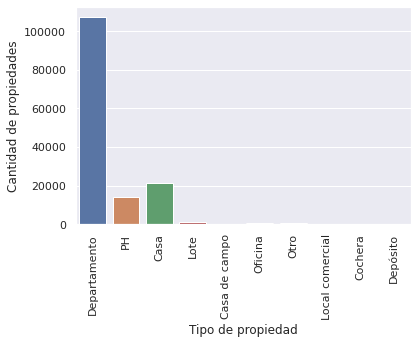

In [ ]:
import seaborn as sns
sns.set(font_scale=1)
sns.countplot(data = propiedades_df, x = "property_type")
plt.xticks(rotation = 90)
plt.ylabel("Cantidad de propiedades")
plt.xlabel("Tipo de propiedad")
plt.show()

Y vemos que los tipos de propiedad con más instancias en el dataset son departamento, casa y PH.

También podemos ver de qué regiones son las publicaciones, esto es, analizar su distribución de acuerdo a la zona del `Gran Buenos Aires` en la que se encuentran. Incluso podemos ver su distribución por barrio dentro de estas regiones.

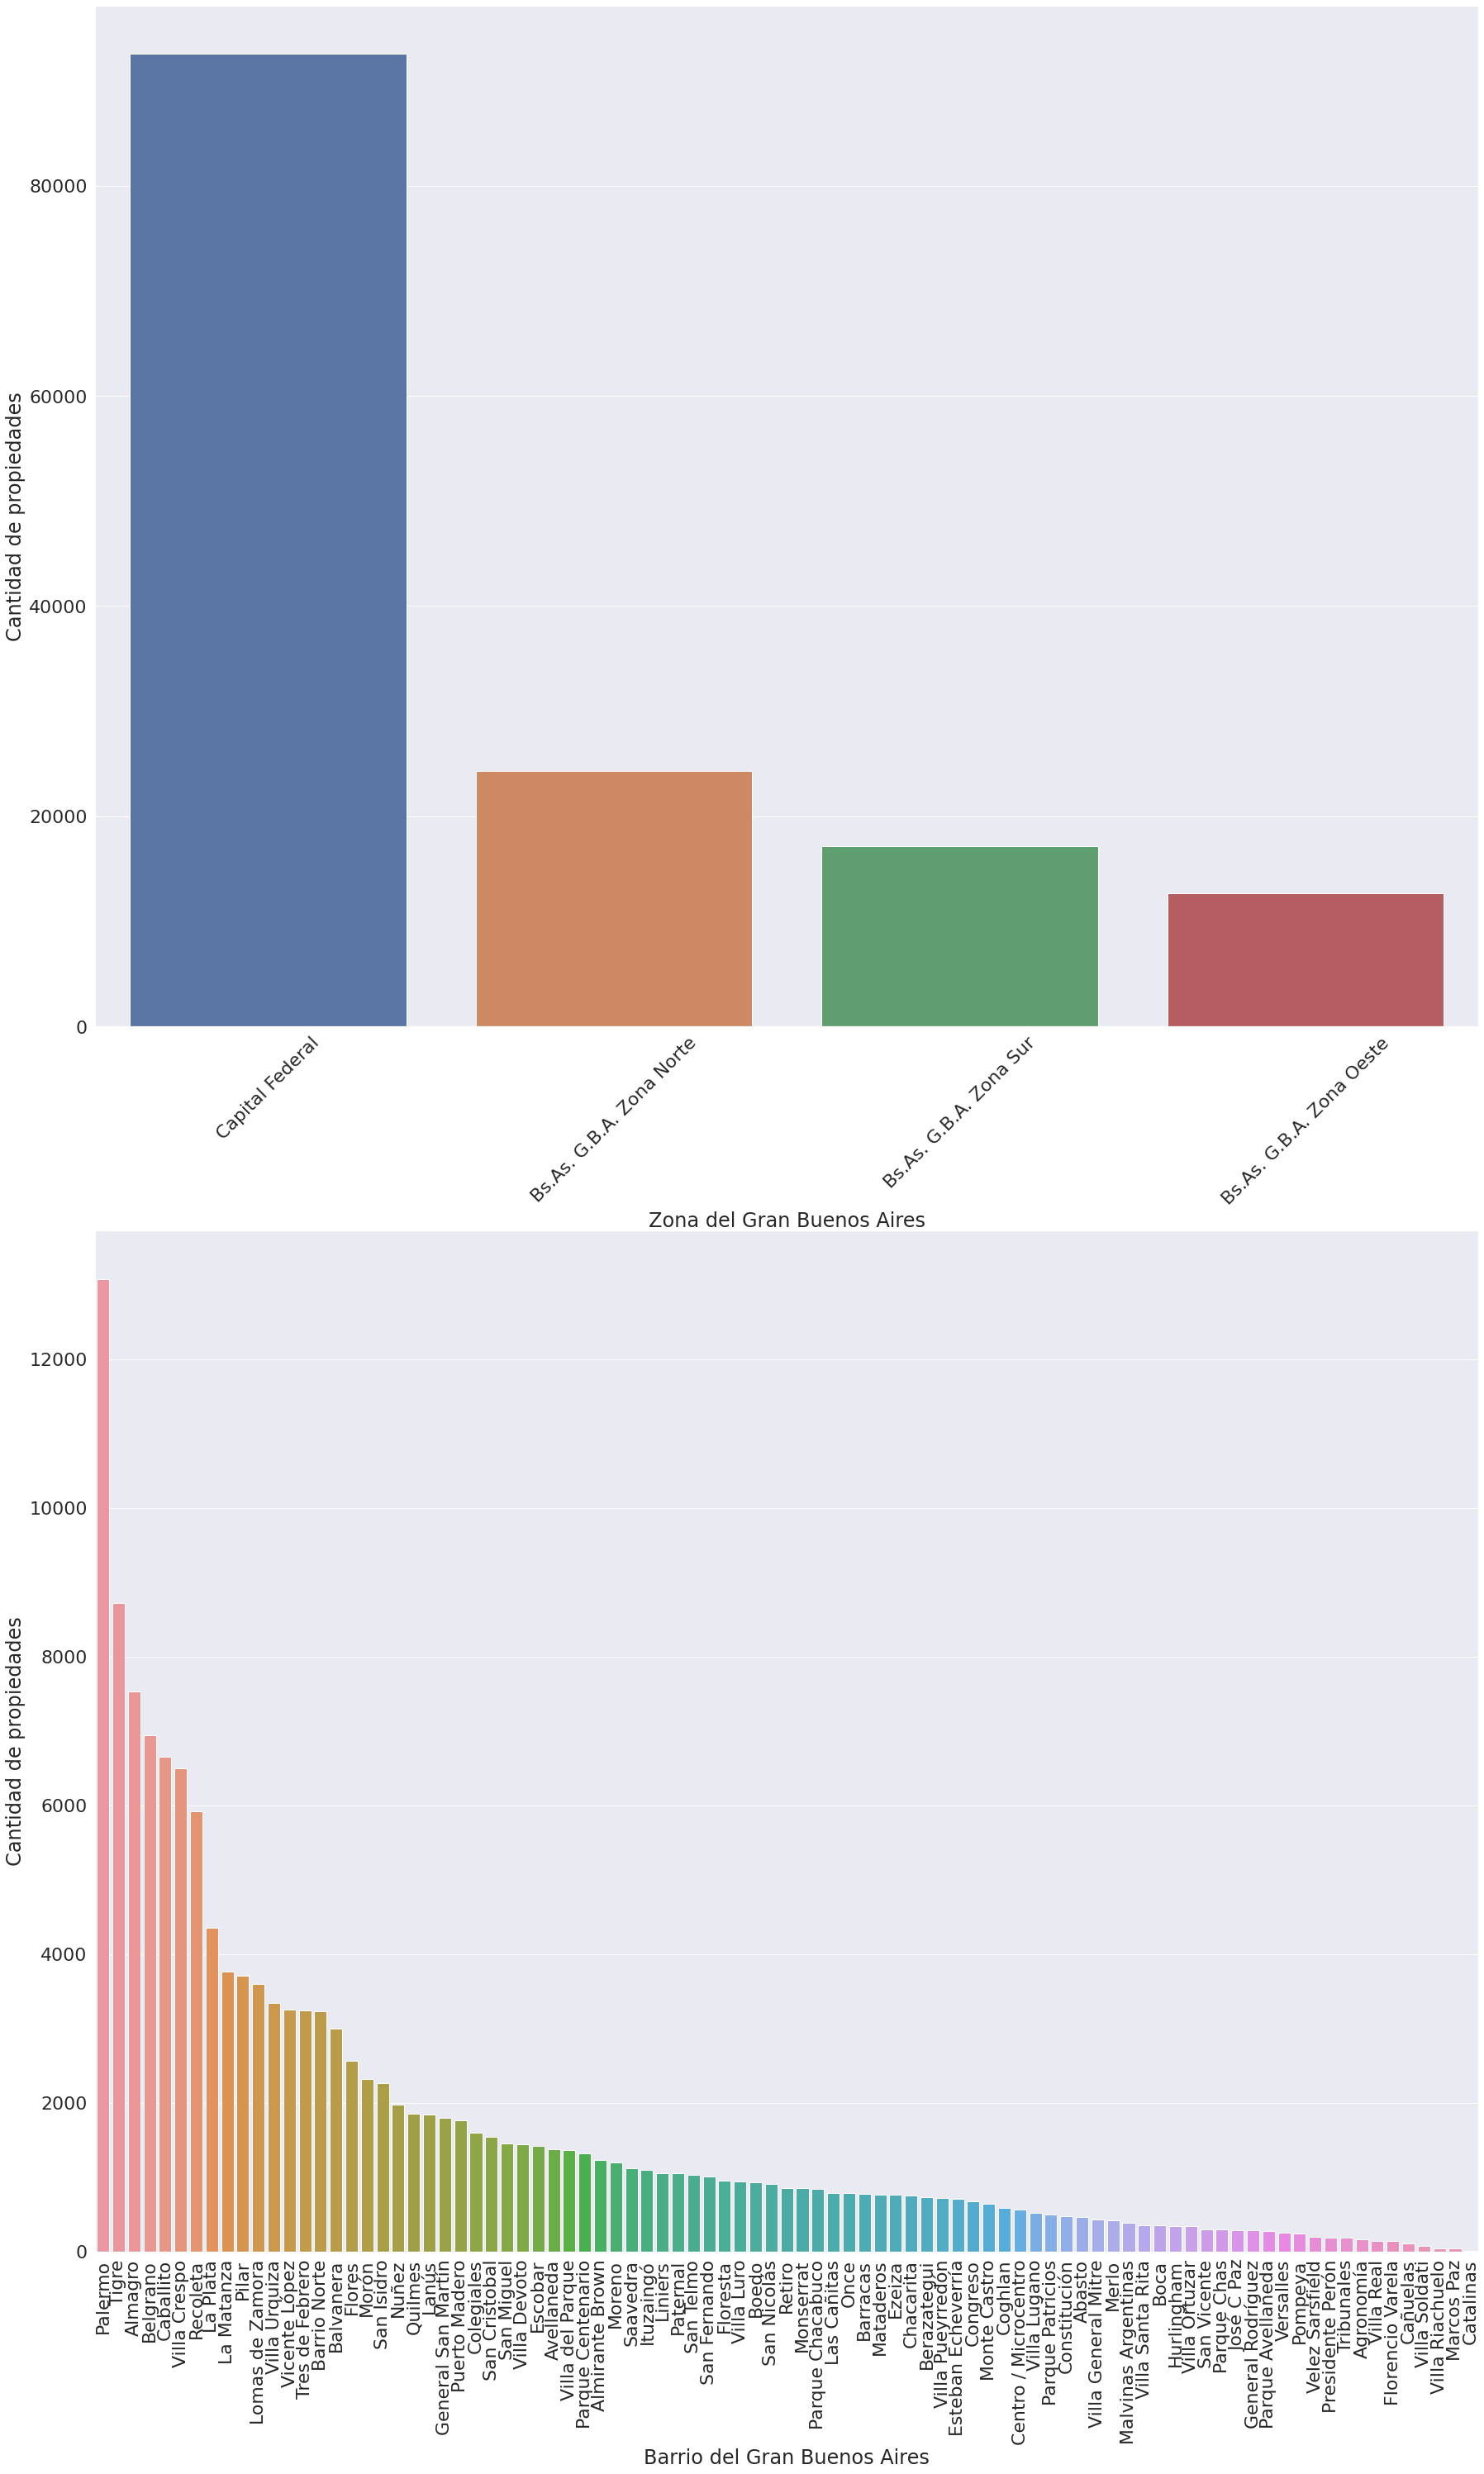

In [ ]:
plt.figure(figsize = (30, 50))
sns.set(font_scale=2)

plt.subplot(2, 1, 1)
sns.countplot(data = propiedades_df, x = "l2", order = propiedades_df["l2"].value_counts().index)
plt.xticks(rotation = 45)
plt.ylabel("Cantidad de propiedades")
plt.xlabel("Zona del Gran Buenos Aires")

plt.subplot(2, 1, 2)
sns.countplot(data = propiedades_df, x = "l3", order = propiedades_df["l3"].value_counts().index)
plt.xticks(rotation = 90)
plt.ylabel("Cantidad de propiedades")
plt.xlabel("Barrio del Gran Buenos Aires")

plt.show()

Aquí vemos que la zona del Gran Buenos Aires con mayor número de propiedades publicadas en Properati es Capital Federal.
Mientras que el barrio con mayor número de propiedades reportadas es Palermo.

Podríamos seleccionar las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas en un nuevo dataframe de la siguiente forma.

In [ ]:
filtered_df = propiedades_df[propiedades_df["property_type"].isin(["Departamento", "PH", "Casa"])]
filtered_df = filtered_df[filtered_df["l2"] == "Capital Federal"]

print(f"Este es un dataset con {filtered_df.shape[0]} instancias y {filtered_df.shape[1]} columnas")

Este es un dataset con 91485 instancias y 19 columnas


## Distribuciones y relaciones de pares

A continuación estudiaremos la distribucion y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad.

Empezamos viendo la estadística descriptiva de nuestro nuevo dataset. Este conjunto de estadísticos nos da una primera idea sobre la relación que guardan nuestros datos entre sí.

In [ ]:
# Estadística descriptiva
pd.set_option('display.float_format', lambda x: '%.2f' % x)
filtered_df.drop(columns = ["lat", "lon"]).describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.00,91485.00,89314.00,82568.00,82250.00,91485.00
mean,2.96,1.96,1.56,112.63,94.97,259500.26
std,1.31,1.07,0.86,980.71,778.52,322265.44
min,1.00,0.00,1.00,10.00,1.00,6000.00
25%,2.00,1.00,1.00,49.00,44.00,120000.00
50%,3.00,2.00,1.00,71.00,63.00,175000.00
75%,4.00,3.00,2.00,111.00,96.00,279000.00
max,26.00,15.00,14.00,126062.00,126062.00,32434232.00


A partir de estos estadísticos, se puede resaltar que el máximo de las variables `surface_total`, `surface_covered` y `price` se encuentran muy por encima del valor que tienen el 25% de propiedades que se encuentran en lo más alto de la distribución. Esto da indicios de que pudo haber errores de medición para algunas instancias y se les asignaron valores que no están generados por la función de distribución de las variables.

Esto se puede observar de otra forma a través de un análisis gráfico de sus distribuciones, por ejemplo a través de boxplots:

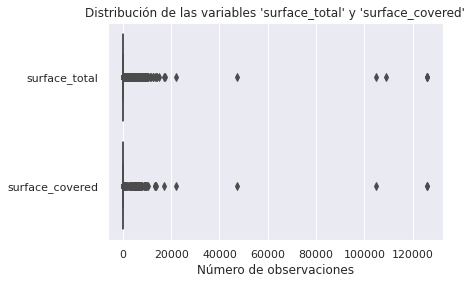

In [ ]:
# Análisis gráfico de las distribuciones de las variables antes de la corrección
sns.set(font_scale=1)
plt.title("Distribución de las variables 'surface_total' y 'surface_covered'")
plt.xlabel("Número de observaciones")
sns.boxplot(data = filtered_df[["surface_total", "surface_covered"]], orient = "h")
plt.show()

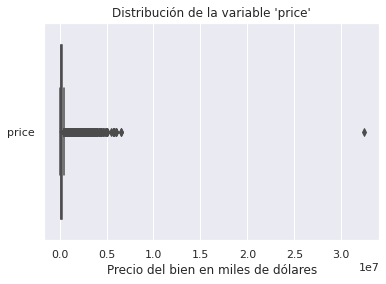

In [ ]:
sns.boxplot(data = filtered_df[["price"]], orient = "h")
plt.title("Distribución de la variable 'price'")
plt.xlabel("Precio del bien en miles de dólares")
plt.show()

### Correción con el método de rango intercuartil

Para efectos prácticos, vamos a asumir que hay valores en las instancias que no están siendo generadas por la función de distribución de las variables `surface_total`, `surface_covered` y `price`. Si tuviéramos conocimiento específico (contexto) sobre la industria que nos permitiera confirmar que algunos de estos datos sí están siendo generados por las distribuciones de sus respectivas variables, pasaríamos a filtrar el dataset con estas consideraciones. 

Como no es el caso, procedemos a hacer la correción de *outliers* utilizando el método de rango intercuartil. 

In [ ]:
# Generación de cuartiles
Q1 = filtered_df.quantile(0.25)
Q3 = filtered_df.quantile(0.75)
IQR = Q3 - Q1
mask = ((filtered_df < (Q1 - 1.5 * IQR)) |(filtered_df > (Q3 + 1.5 * IQR))).any(axis = 1)
filtered_df = filtered_df[~mask]
filtered_df.shape

(79211, 19)

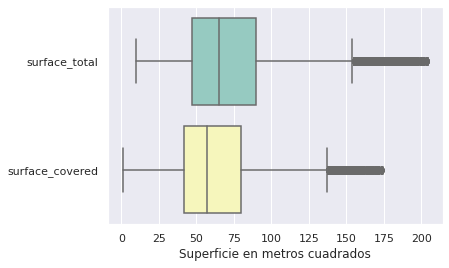

In [ ]:
# Análisis gráfico de las distribuciones de las variables después de la corrección
sns.boxplot(data = filtered_df[["surface_total", "surface_covered"]], palette="Set3", orient = "h")
plt.xlabel("Superficie en metros cuadrados")
plt.show()

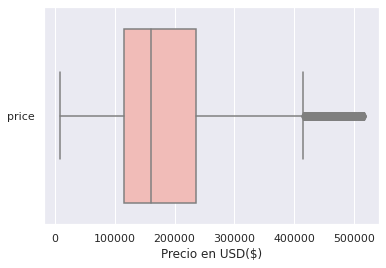

In [ ]:
sns.boxplot(data = filtered_df[["price"]], palette='Pastel1', orient = "h")
plt.xlabel("Precio en USD($)")
plt.show()

A partir de los gráficos se observa que la correción por el método de rango intercuartil hizo que los máximos de las respectivas variables estuvieran más cerca de los valores que el 25% más alto de la distribución tenían.

### Explorando relaciones entre las variables gráficamente

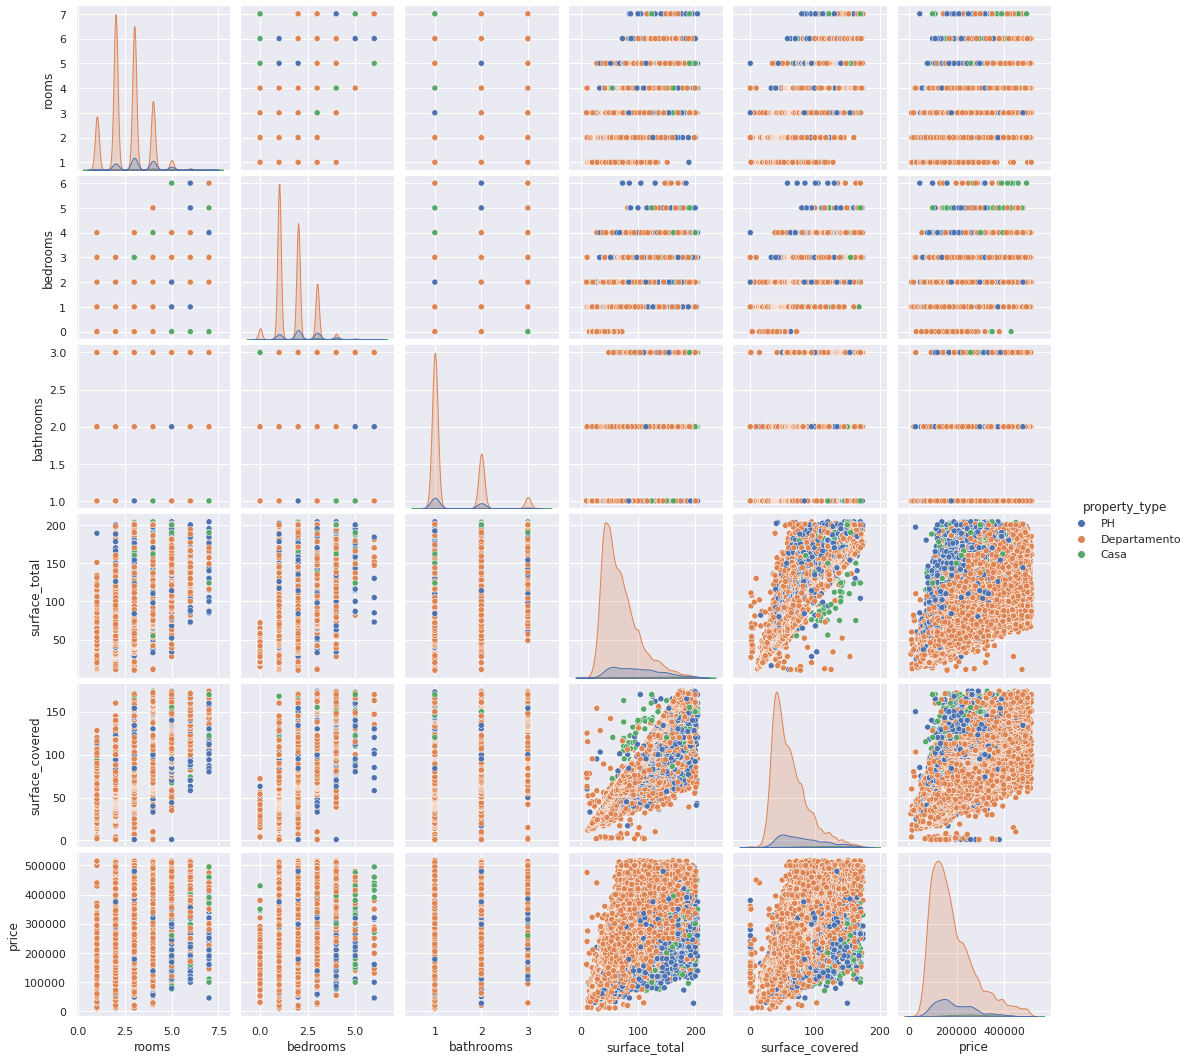

In [ ]:
sns.pairplot(data = filtered_df.drop(["lat", "lon"], axis = 1), hue = "property_type")
plt.show()

Respecto a las relaciones entre las variables del dataset podemos señalar que:

* Se observa preliminarmente una relación positiva entre los atributos numéricos del dataset y la variable price.
* No se observa una relación clara entre las variables categóricas bathrooms, bedrooms, rooms y precio.
* Las variables surface_total y surface_covered muestran una relación positiva entre sí.


### Correlaciones

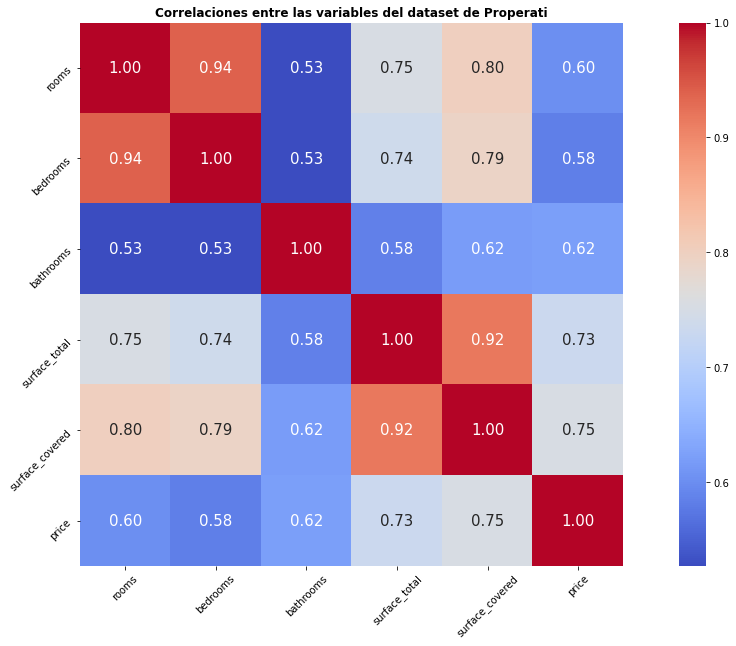

In [ ]:
corr = filtered_df.drop(columns = ['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'currency', 'title', 'description', 'property_type',
       'operation_type']).corr()
plt.figure(figsize=(20,10))
plt.title("Correlaciones entre las variables del dataset de Properati", fontweight = "semibold", fontsize = "large")
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= filtered_df.drop(columns = ['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'currency', 'title', 'description', 'property_type',
       'operation_type']).columns, 
           yticklabels= filtered_df.drop(columns = ['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'currency', 'title', 'description', 'property_type',
       'operation_type']).columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

A través de este mapa de calor de correlaciones se demuestra lo que señalábamos en el punto anterior, pero adicionalmente que:

* Las variables rooms y bedrooms se correlacionan altamente entre sí.
* Las variables bedrooms, rooms y bathrooms tienen una correlación positiva con la variable price.


### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.

**Pregunta a responder**: ¿Cuál fue el tipo de propiedad de la `Capital Federal` que tuvo el menor tiempo su anuncio publicado en *Properati*? ¿Cuál fue el barrio de la `Capital Federal` con la mayor duración del anuncio publicado en *Properati*?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Convertimos las columnas de fecha a tipo datetime
filtered_df["start_date"] = pd.to_datetime(filtered_df["start_date"], errors = 'coerce')
filtered_df["end_date"] = pd.to_datetime(filtered_df["end_date"], errors = 'coerce')

In [ ]:
# filtramos los NaN
filtered_df = filtered_df.dropna()

In [ ]:
# Nos quedamos con el número de días
filtered_df["Duración del anuncio"] = (filtered_df["end_date"] - filtered_df["start_date"])
filtered_df["Duración del anuncio"] = filtered_df["Duración del anuncio"].dt.days
filtered_df["count"] = 1

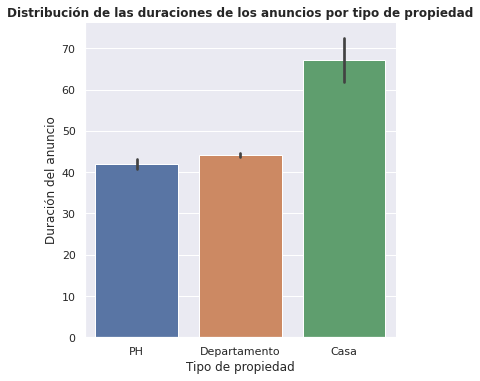

In [ ]:
# Distribución de las duraciones de los anuncios por tipo de propiedad
sns.catplot(x="property_type", y= "Duración del anuncio", data=filtered_df, kind="bar")
plt.title("Distribución de las duraciones de los anuncios por tipo de propiedad", fontweight = "semibold")
plt.xlabel("Tipo de propiedad")
plt.show()

A partir de estos gráficos se puede observar que el tipo de propiedad `PH` es el que en promedio tarda menos tiempo con anuncios publicados en la página de *Properati*. Una hipótesis de porqué este puede ser el caso, es que las preferencias de los consumidores se orientan a la demanda de este tipo de propiedad, por lo tanto, se venden más rápido (se da de baja el anuncio en una menor cantidad de tiempo).

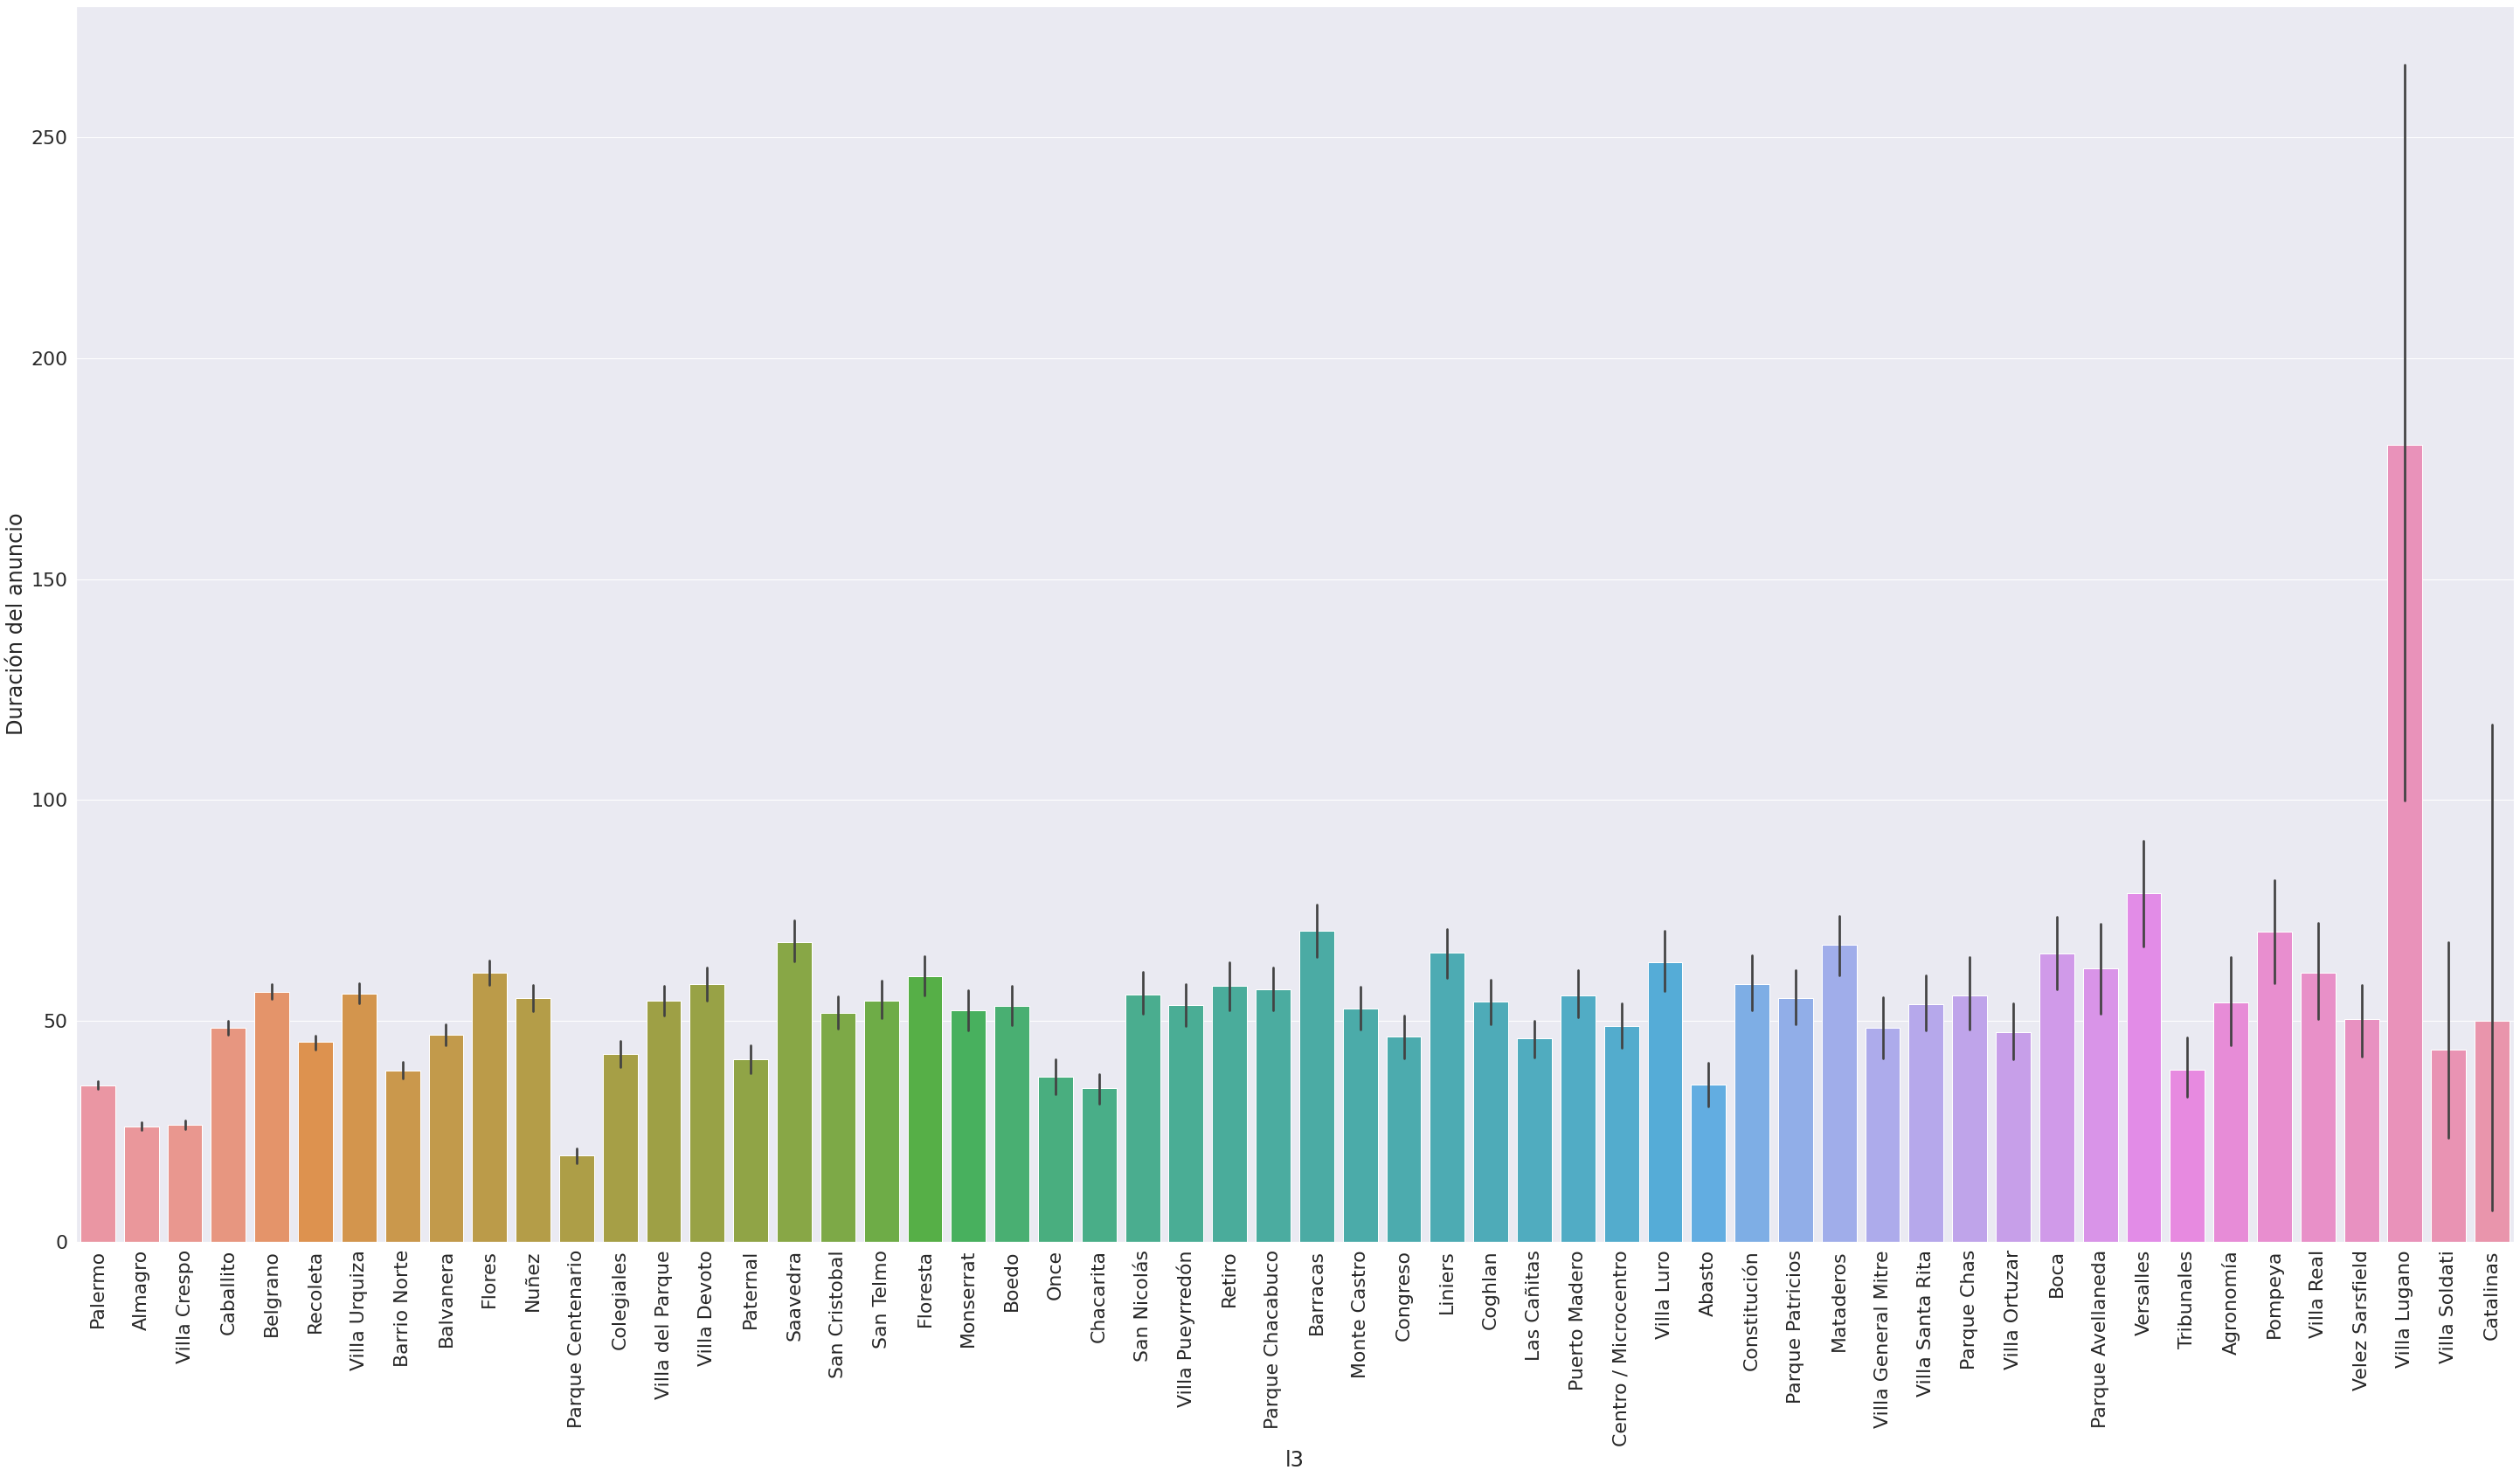

In [ ]:
plt.figure(figsize = (50, 26))
sns.set(font_scale=2)
plot_order = filtered_df.groupby('l3')['Duración del anuncio'].sum().sort_values(ascending=False).index.values
sns.barplot(x="l3", y= "Duración del anuncio", data=filtered_df, order = filtered_df["l3"].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

Este gráfico nos permite decir que el barrio con mayor duración promedio en la página de *Properati* es `Villa Lugano`. Una hipótesis de porqué este puede ser el caso se debe a la configuración socioeconómica de los barrios del sur de Buenos Aires. El desarrollo del mercado inmobiliario de `Villa Lugano` se articuló con el crecimiento de activades productivas como los mataderos y las fábricas, por lo que se establecieron inmuebles relacionados predominantemente a la producción industrial. 

Otro rasgo importante de `Villa Lugano` es que es una zona de alta concentración de viviendas de interés social que, por diferentes políticas estatales, se ha visto segregada del <a href="https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwi2kt3j987xAhWCSTABHY2HCHkQFjAVegQILxAD&url=https%3A%2F%2Frevistas.javeriana.edu.co%2Findex.php%2Fcvyu%2Farticle%2FviewFile%2F5549%2F4366&usg=AOvVaw20lGKUEv_I72j_2qYr5B6R">resto de la ciudad </a>. Esto ha desincentivado el interés del sector privado en materia de inversión, lo que puede afectar la intención de compra de los consumidores en esa zona (los anuncios duran en promedio más tiempo publicados)

## 3. Dos modelos de Machine Learning para predecir el precio de los inmuebles

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Acamica/Sprint 1 - Data Science - Acamica/Clase8/Proyecto/DS_Proyecto_01_Datos_Properati.csv")
df = df[df["property_type"].isin(["Departamento", "PH", "Casa"])]
df = df[["rooms", "bedrooms", "bathrooms", "l2", "surface_total", "surface_covered", "price"]]
df = df[(df["l2"] == "Capital Federal") & (df["surface_total"] >= 15) & (df["surface_total"] <= 1000) & (df["price"] <= 4000000)].dropna()
df.drop(columns = "l2", inplace=True)
print(f"Este es un dataset con {df.shape[0]} instancias y {df.shape[1]} columnas")

Este es un dataset con 81019 instancias y 6 columnas


## 3.1 Elección de la métrica de desempeño de los modelos (`RMSE`)

Hay que destacar que la métrica que vamos a utilizar para medir el rendimiento de nuestros modelos será el `RMSE`. Esta métrica es útil para este análisis en concreto porque permite la comparación entre modelos lineales (regresión) y modelos que no son exclusivamente lineales (KNN y DT). Adicionalmente, esta métrica facilita la interpretación de los resultados (está en la misma medida que la variable `price`) y es más sensible a datos atipicos.

Si lo comparamos a la métrica `MSE`, preferimos usar el `RMSE` porque este último toma la raíz de los errores, lo que significa que es más sensible a detectar outliers en la distribución de los errores (penaliza más a los errores más grandes). Esta característica es interesante para nuestro problema porque es una forma de ver qué tanta varianza existe para la diferencia de las etiquetas de `train` y `test`. Si la diferencia es muy grande, se penalizará de tal forma que se genere un error mayor comparado a `MSE`. Así pues, `RMSE` nos da un mejor panorama de la distribución de los errores predichos y nos ayuda a escoger un modelo más preciso.

## 3.2 Modelo benchmark: Regresión lineal

Se escoge como modelo benchmark el modelo de regresión lineal múltiple con todos los features del dataset. La hipótesis detrás de esta elección es que hay un ajuste lineal entre todos los features del dataset y la variable que queremos predecir, el precio. 

In [ ]:
# Modelos benchmark regresión lineal

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Definimos varios datasets para identificar qué variables "aportan" más a la disminución de los errores (RMSE)
X1 = df.drop(columns = ["price"])
X2 = df.drop(columns = ["surface_covered", "price"])
X3 = df.drop(columns = ["bedrooms", "surface_covered", "price"])
X4 = df.drop(columns = ["rooms", "surface_total", "price"])
X5 = df.drop(columns = ["surface_covered", "price"])
X6 = df.drop(columns = ["bedrooms", "price"])
X7 = df.drop(columns = ["rooms", "price"])
X8 = df.drop(columns = ["surface_total", "price"])

y = df[["price"]]

datasets = [X1, X2, X3, X4, X5, X6, X7, X8]


# Listas vacías para generar nuestro dataset de errores (para cada base, para cada tipo de métrica)

lista_accuracy_train = []
lista_accuracy_test = []

lista_datasets_train = []
lista_datasets_test = []

for i, dset in enumerate(datasets):
    

     X_train, X_test, y_train, y_test = train_test_split(dset, y, test_size = 0.30, random_state = 42)


    # Definir el modelo con el valor de vecinos deseado
     reg_lineal = LinearRegression()
        
    # Entrenar el modelo
     reg_lineal.fit(X_train, y_train)
        
    # Predecir y evaluar sobre el set de entrenamiento
     y_train_pred = reg_lineal.predict(X_train)
     rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        
    # Predecir y evaluar sobre el set de evaluación
     y_test_pred = reg_lineal.predict(X_test)
     rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        
    # Agregar la información a las listas
    
     lista_accuracy_train.append(rmse_train)
     lista_accuracy_test.append(rmse_test)

     lista_datasets_train.append(lista_accuracy_train[0])
     lista_datasets_test.append(lista_accuracy_test[0])

     lista_accuracy_train = []
     lista_accuracy_test = []


In [ ]:
reg_dict = {"Modelo": [], "Features":[], "Train":[], "Test":[]}
for i, dset in enumerate(lista_datasets_train):

    X_train = lista_datasets_train[i]
    X_test = lista_datasets_test[i]
    features = datasets[i].columns

    reg_dict["Modelo"].append(f"X{i + 1}")
    reg_dict["Features"].append(list(features))
    reg_dict["Train"].append(round(X_train, 2))
    reg_dict["Test"].append(round(X_test, 2))
    

### Resultados modelos benchmark

In [ ]:
reg_df = pd.DataFrame(reg_dict)
reg_df.set_index("Modelo", inplace = True)
reg_df

,Features,Train,Test
Modelo,,,
X1,"[rooms, bedrooms, bathrooms, surface_total, su...",199173.83,202449.37
X2,"[rooms, bedrooms, bathrooms, surface_total]",199596.13,202260.73
X3,"[rooms, bathrooms, surface_total]",201136.20,204178.13
X4,"[bedrooms, bathrooms, surface_covered]",224281.77,232344.96
X5,"[rooms, bedrooms, bathrooms, surface_total]",199596.13,202260.73
X6,"[rooms, bathrooms, surface_total, surface_cove...",200714.44,204376.20
X7,"[bedrooms, bathrooms, surface_total, surface_c...",199249.99,202634.10
X8,"[rooms, bedrooms, bathrooms, surface_covered]",221944.71,229099.88


### Análisis del modelo benchmark X1

In [ ]:
from sklearn.linear_model import LinearRegression
reg_lineal = LinearRegression()

In [ ]:
# Separamos features y etiquetas para modelo benchmark 
from sklearn.model_selection import train_test_split
X = df.loc[:, "rooms": "surface_covered"]
y = df[["price"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [ ]:
# Entrenamos el modelo
reg_lineal.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Valores predichos para train y test
y_train_pred = reg_lineal.predict(X_train)
y_test_pred = reg_lineal.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 199173.83253528475
Raíz del error cuadrático medio en Test: 202449.36540361578


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


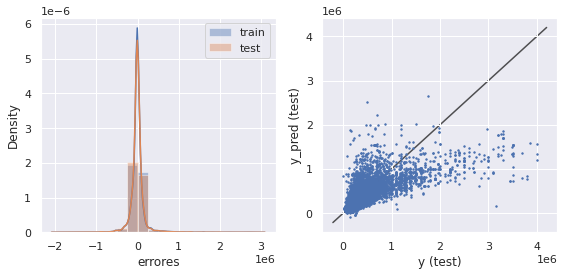

In [ ]:
# Distribución de los errores
sns.set(font_scale=1)
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

Si nos fijamos en la distribución de los errores, vemos que se encuentran alrededor de 0 y a juzgar por su forma tienen una desviación relativamente pequeña.

El gráfico de valores predichos y valores reales nos muestra que el modelo predice muy bien la variable precio cuando el precio de los inmuebles es relativamente bajo (mayor concentración de puntos a lo largo de la diagonal). 

## 3.3 Modelo 1: KNN - Vecinos más cercanos

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors = 5)

In [ ]:
# Entrenamos nuestro modelo 
KNN.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
# Predecimos nuestras etiquetas con la matriz X
y_train_pred = KNN.predict(X_train)
y_test_pred = KNN.predict(X_test)

In [ ]:
# Medimos la precisión de nuestro modelo 
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

Raíz del error cuadrático medio en Train: 121300.24049431273
Raíz del error cuadrático medio en Test: 155040.1332898459


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


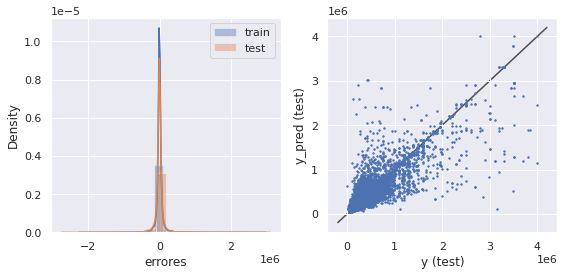

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

Si nos fijamos en la distribución de los errores, vemos que se encuentran alrededor de 0 y a juzgar por su forma tienen una desviación más pequeña que la desviación del modelo benchmark. Esto es un indicio de que el modelo KNN es más eficiente que el modelo de regresión lineal.

El gráfico de valores predichos y valores reales nos muestra que el modelo predice muy bien la variable precio cuando el precio de los inmuebles es relativamente bajo (mayor concentración de puntos a lo largo de la diagonal). Comparado al modelo de regresión lineal, vemos que hay mayor dispersión a medida que el precio de los inmuebles aumenta (i.e los features que se correlacionan positivamente con el precio aumentan en magnitud).

### 3.3.1 Optimización del número de vecinos

A continuación vamos a optimizar los hiperparámetros `n_neighbors` y `metric` para encontrar el model que mejor predice el precio de los inmuebles sin generar sobreajuste (que aprende lo suficiente del dataset sin perder poder de generalización ante nuevas instancias).

In [ ]:
# Optmización KNN

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Definimos varios datasets para identificar qué variables "aportan" más a la disminución de los errores (RMSE)
X1 = df.drop(columns = ["price"])
X2 = df.drop(columns = ["surface_covered", "price"])
X3 = df.drop(columns = ["bedrooms", "surface_covered", "price"])
X4 = df.drop(columns = ["rooms", "surface_total", "price"])
X5 = df.drop(columns = ["surface_covered", "price"])
X6 = df.drop(columns = ["bedrooms", "price"])
X7 = df.drop(columns = ["rooms", "price"])
X8 = df.drop(columns = ["surface_total", "price"])

y = df[["price"]]

datasets = [X1, X2, X3, X4, X5, X6, X7, X8]

# Definimos la lista de valores de k vecinos a explorar
k_vecinos = np.arange(1, 52, 3)

# Definimos lista de distancias sobre la cuál vamos a iterar
metricas = ["euclidean", "manhattan", "chebyshev", "minkowski"]

# Listas vacías para generar nuestro dataset de errores (para cada base, para cada tipo de métrica)

lista_accuracy_train = []
lista_accuracy_test = []

lista_metrica_train = []
lista_metrica_test = []

lista_datasets_train = []
lista_datasets_test = []

for i, dset in enumerate(datasets):

  X_train, X_test, y_train, y_test = train_test_split(dset, y, test_size = 0.30, random_state = 42)


  # Generamos un loop sobre las distintas métricas
  for metrica in metricas:

      # Generamos un loop sobre los k vecinos
      for k in k_vecinos:
      
        
        # Definir el modelo con el valor de vecinos deseado
        KNN = KNeighborsRegressor(n_neighbors= k, metric = metrica)
        
        # Entrenar el modelo
        KNN.fit(X_train, y_train)
        
        # Predecir y evaluar sobre el set de entrenamiento
        y_train_pred = KNN.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        
        # Predecir y evaluar sobre el set de evaluación
        y_test_pred = KNN.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        
        # Agregar la información a las listas
        lista_metrica_train.append(rmse_train)
        lista_metrica_test.append(rmse_test)

      lista_accuracy_train.append(lista_metrica_train)
      lista_accuracy_test.append(lista_metrica_test)

      lista_metrica_test = []
      lista_metrica_train = []

  lista_datasets_train.append(lista_accuracy_train)
  lista_datasets_test.append(lista_accuracy_test)

  lista_accuracy_train = []
  lista_accuracy_test = []


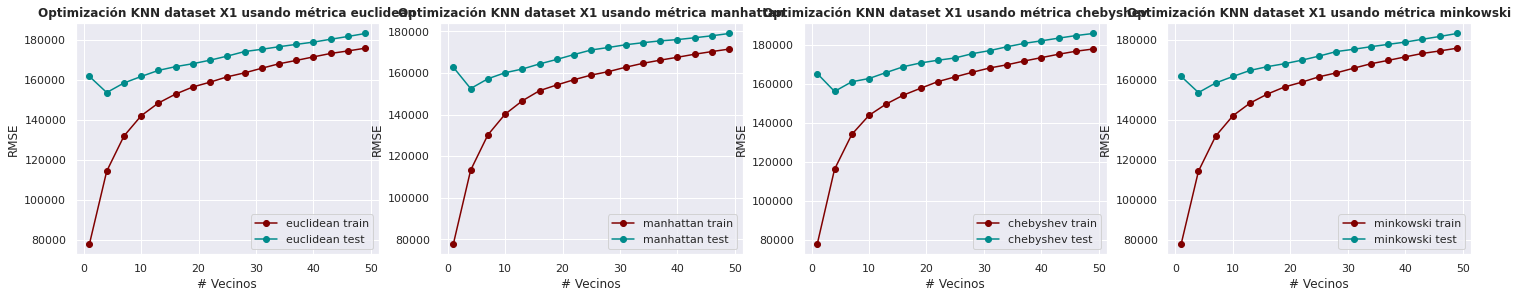

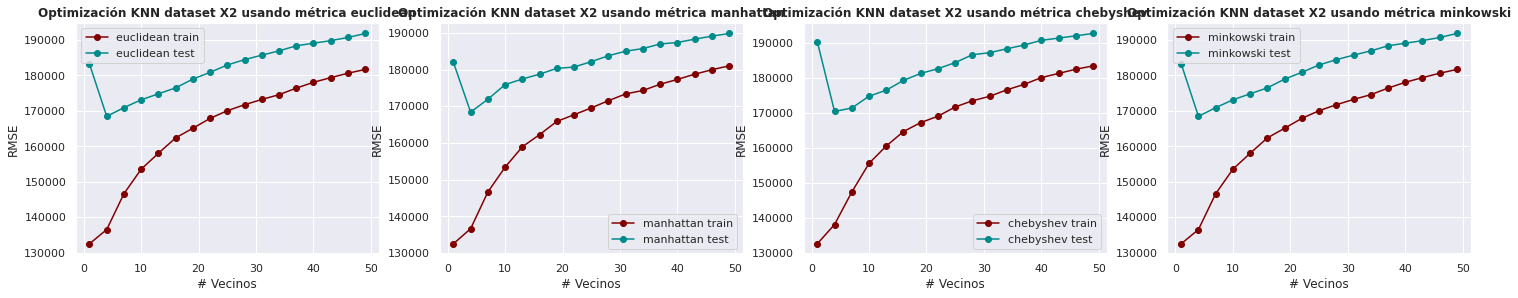

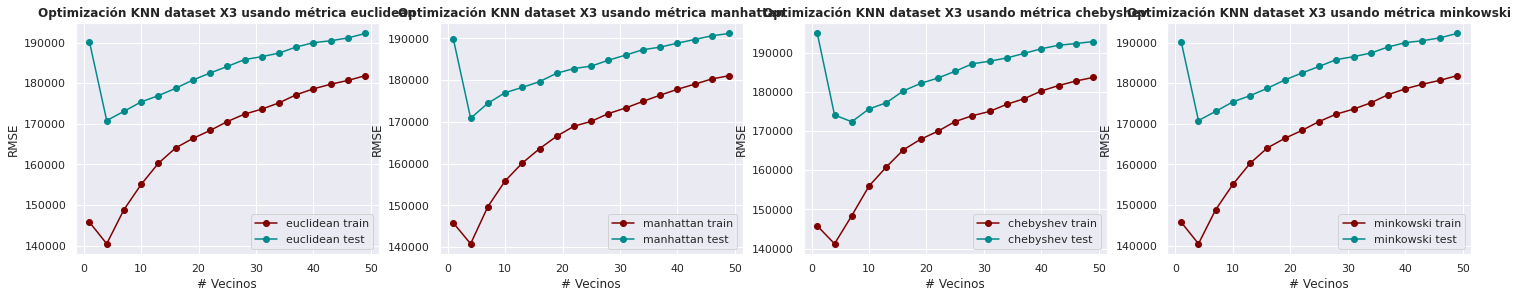

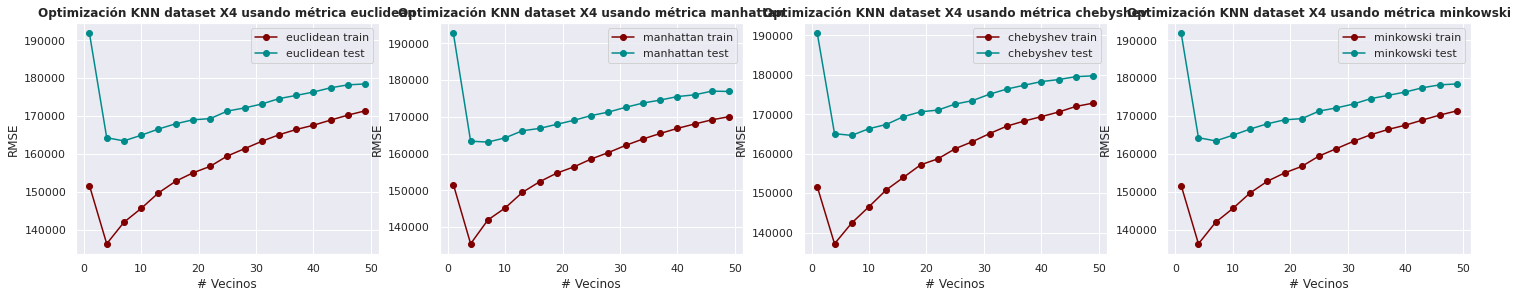

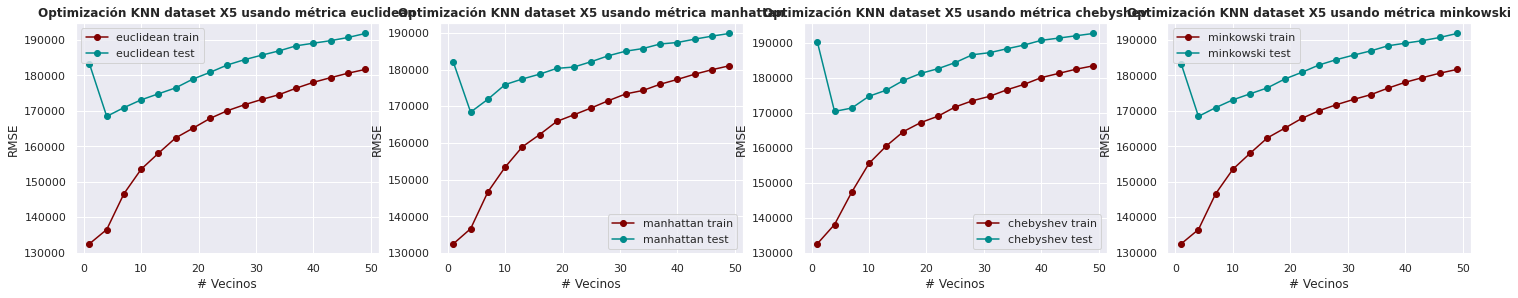

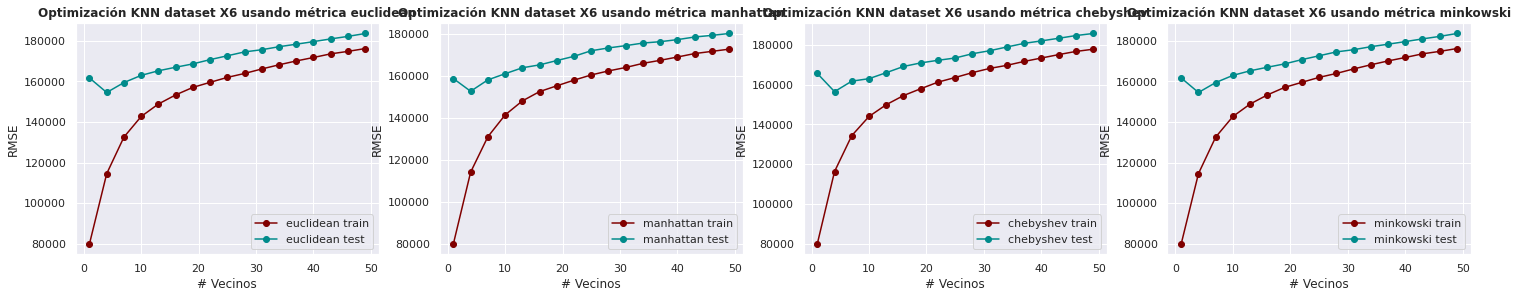

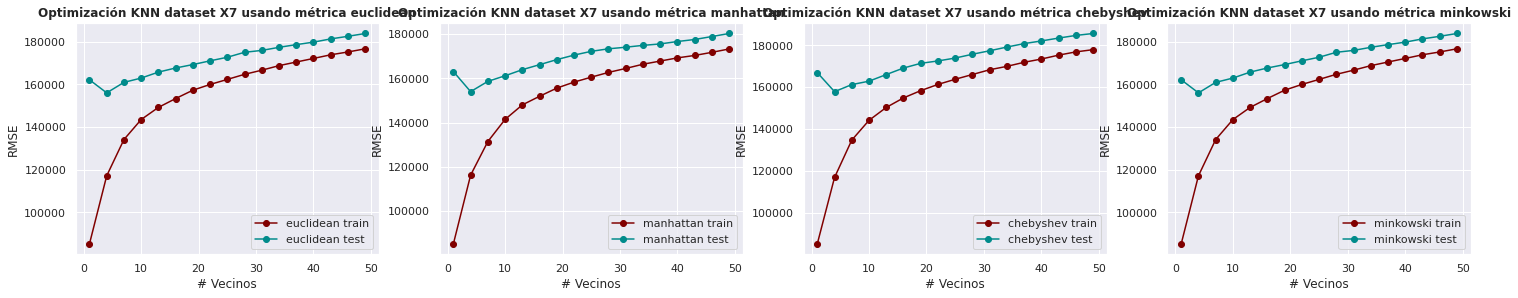

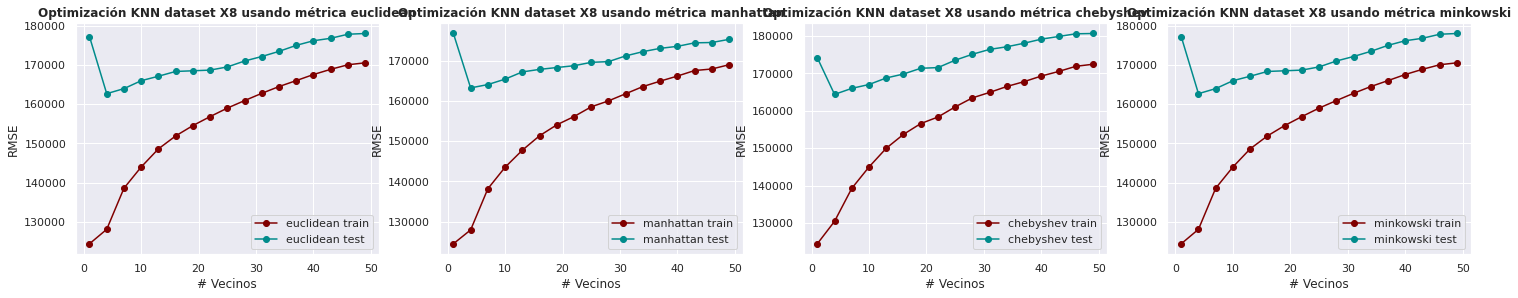

In [ ]:
x = 1
KNN_dict = {"Modelo": [], "Metrica":[], "Features":[], "Train":[], "Test":[], "Vecinos": []}
for i, dset in enumerate(lista_datasets_train):

  X_train = lista_datasets_train[i]
  X_test = lista_datasets_test[i]
  features = datasets[i].columns
  plt.figure(figsize=(25, 40))
  for d, metrica in enumerate(metricas):
    metrica_train = X_train[d]
    metrica_test = X_test[d]

    KNN_dict["Modelo"].append(f"X{i + 1}")
    KNN_dict["Metrica"].append(metrica)
    KNN_dict["Features"].append(list(features))

    plt.subplot(8, 4, x)
    plt.plot(k_vecinos, metrica_train, "o-", label=f"{metrica} train", c = "maroon" )
    plt.plot(k_vecinos, metrica_test,'o-',label=f"{metrica} test", c = "darkcyan")
    plt.legend()
    plt.xlabel("# Vecinos")
    plt.ylabel("RMSE")
    plt.title(f"Optimización KNN dataset X{i + 1} usando métrica {metrica}", fontsize = "medium", fontweight = "semibold")
    x += 1
  for d, metrica in enumerate(metricas):
    KNN_dict["Train"].append(round(X_train[d][1], 2))
    KNN_dict["Test"].append(round(X_test[d][1], 2))
    KNN_dict["Vecinos"].append(3)

A partir de estos graficos encontramos como conclusión preliminar que para cada dataset propuesto, la medida de cercanía entre los vecinos hace indiferente cual usemos (la diferencia en `RMSE` es pequeña) 

Por otro lado, vemos que `n_neighbors = 3` es el hiperparámetro que genera la mejor predicción del precio de los features en general. 

A continuación evaluamos el modelo que, a nuestro criterio, es el mejor en términos de eficiencia y poder de predicción para generalizar.

### 3.3.2 Evaluando el modelo X1 con métrica Manhattan y todos los features

Comparando los errores de train y test de todos los modelos (teniendo en cuenta los hiperparámetros `n_neighbors` y `metric`) concluimos que el mejor modelo KNN es el que usa todos los features y la métrica `manhattan`. Este modelo minimiza los errores de train y test del dataset, teniendo en cuenta que no haya sobreajuste y, por lo tanto, se pierda poder de predicción.

In [ ]:
KNN = KNeighborsRegressor(n_neighbors = 3, metric = "manhattan")

In [ ]:
# Separamos features y etiquetas 
from sklearn.model_selection import train_test_split
X = df.drop(columns = ["price"])
y = df[["price"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [ ]:
# Entrenamos el modelo 
KNN.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [ ]:
# Valores predichos para train y test
y_train_pred = KNN.predict(X_train)
y_test_pred = KNN.predict(X_test)

In [ ]:
# Medimos precisión del modelo
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

Raíz del error cuadrático medio en Train: 103288.59902624281
Raíz del error cuadrático medio en Test: 152009.8265345303


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


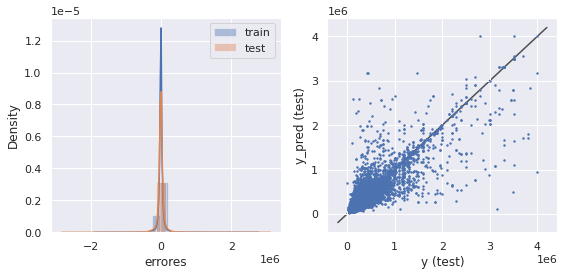

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

Si nos fijamos en los gráficos de la precisión del modelo vemos que la versión optimizada del modelo KNN tiene una distribución de los errores centrada en 0 con una desviación pequeña. Sin embargo, no es tan claro que que sea mejor prediciendo. 

Para aclarar cual modelo es mejor, nos referimos a los `RMSE` y podemos concluir que este modelo mejora el rendimiento respecto al modelo KNN con `n_neighbors = 5` y `metric = "euclidean"`.

## 3.4 Modelo 2: DT - Árbol de Decisión 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(max_depth = 5, random_state = 42)

In [ ]:
# Separamos features y etiquetas para modelo benchmark 
from sklearn.model_selection import train_test_split
X = df.loc[:, "rooms": "surface_covered"]
y = df[["price"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

In [ ]:
y_train = y_train.to_numpy() 
y_test = y_test.to_numpy()

Raíz del error cuadrático medio en Train: 169200.1754118897
Raíz del error cuadrático medio en Test: 174352.7367379676


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


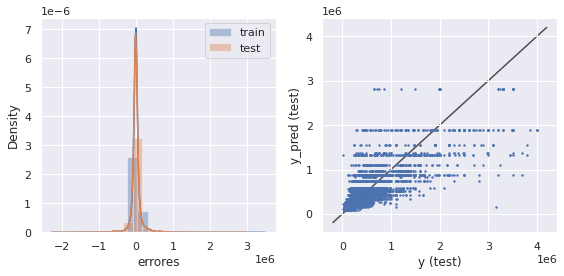

In [ ]:
# Medimos precisión del modelo 

print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')


plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
sns.distplot(y_train.ravel() - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test.ravel() - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

Si nos fijamos en la distribución de los errores, vemos que se encuentran alrededor de 0 y a juzgar por su forma tienen una desviación más pequeña que la desviación del modelo benchmark. Esto es un indicio de que el modelo DT es más eficiente que el modelo de regresión lineal.

El gráfico de valores predichos y valores reales nos muestra que este modelo de arbol de regresión no es tan preciso a la hora de predecir los valores `y` predichos con los features `X_test`

### 3.4.1 Optimización profundidad del árbol

A continuación vamos a optimizar los hiperparámetros `max_depth` y `splitter` para encontrar el modelo que mejor predice el precio de los inmuebles sin generar sobreajuste.

In [ ]:
# Optimización DT

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Definimos varios datasets para identificar qué variables "aportan" más a la disminución de los errores (RMSE)
X1 = df.drop(columns = ["price"])
X2 = df.drop(columns = ["surface_covered", "price"])
X3 = df.drop(columns = ["bedrooms", "surface_covered", "price"])
X4 = df.drop(columns = ["rooms", "surface_total", "price"])
X5 = df.drop(columns = ["surface_covered", "price"])
X6 = df.drop(columns = ["bedrooms", "price"])
X7 = df.drop(columns = ["rooms", "price"])
X8 = df.drop(columns = ["surface_total", "price"])

y = df[["price"]]

datasets = [X1, X2, X3, X4, X5, X6, X7, X8]

# Definimos la lista de valores de profundidad que vamos a explorar
max_depths = np.arange(1, 52, 2)

# Generamos una lista con los distintos tipos de "split":
splitter = ["best", "random"]

lista_accuracy_train_ = []
lista_accuracy_test_ = []

lista_metrica_train_ = []
lista_metrica_test_ = []

lista_datasets_train_ = []
lista_datasets_test_ = []

for i, dset in enumerate(datasets):

  X_train, X_test, y_train, y_test = train_test_split(dset, y, test_size = 0.30, random_state = 42)


  # Generamos un loop sobre los distintos tipos de split
  for split in splitter:


    # Generamos un loop sobre los distintos valores de profundidad 
    for max_depth in max_depths:

    # Crear árbol
      tree = DecisionTreeRegressor(max_depth= max_depth, random_state=42, splitter = split)

    # Entrenar
      tree.fit(X_train, y_train)

    # Predicción train
      y_train_pred = tree.predict(X_train)
      rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

    # Predicción test
      y_test_pred = tree.predict(X_test)
      rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Añadimos los valores de los errores a las listas
      lista_metrica_train_.append(rmse_train)
      lista_metrica_test_.append(rmse_test)


    lista_accuracy_train_.append(lista_metrica_train_)
    lista_accuracy_test_.append(lista_metrica_test_)

    lista_metrica_test_ = []
    lista_metrica_train_ = []

  lista_datasets_train_.append(lista_accuracy_train_)
  lista_datasets_test_.append(lista_accuracy_test_)

  lista_accuracy_train_ = []
  lista_accuracy_test_ = []
    

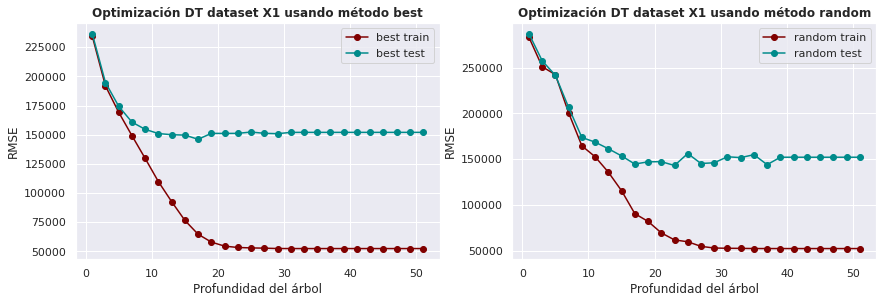

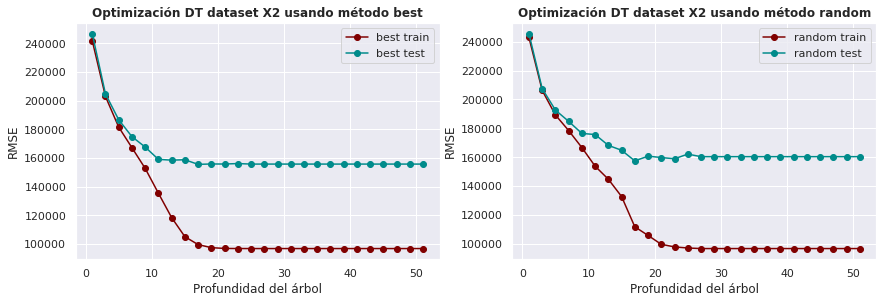

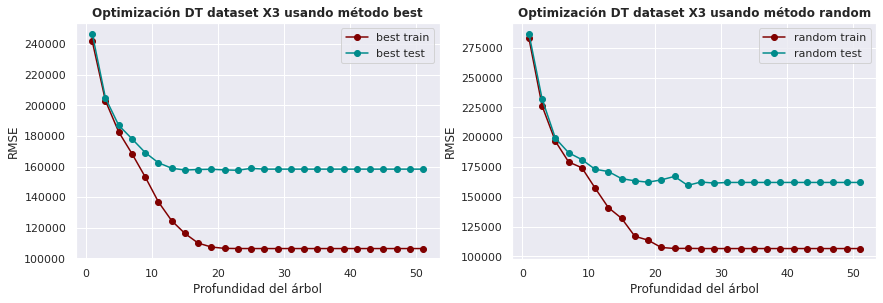

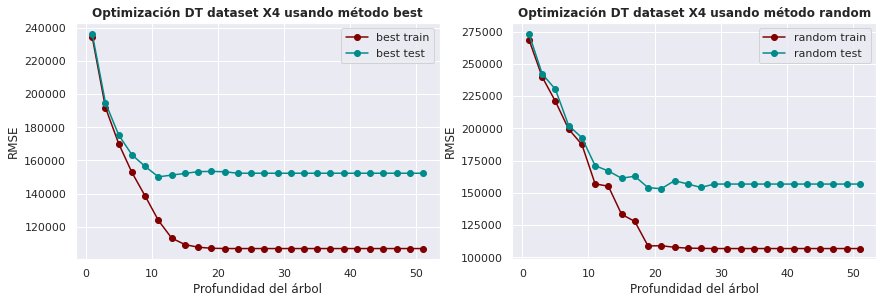

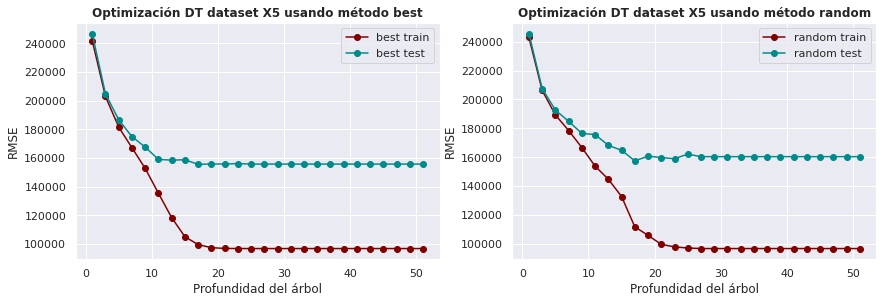

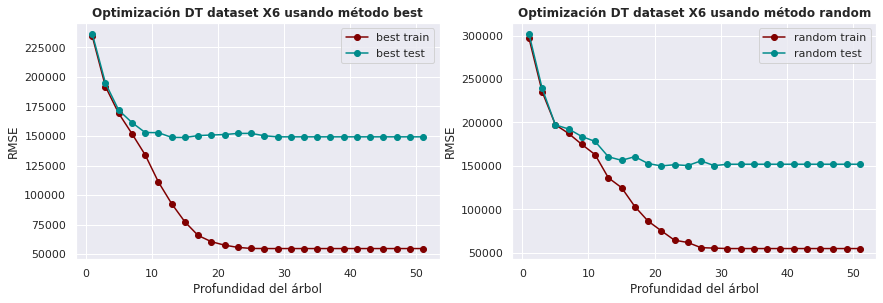

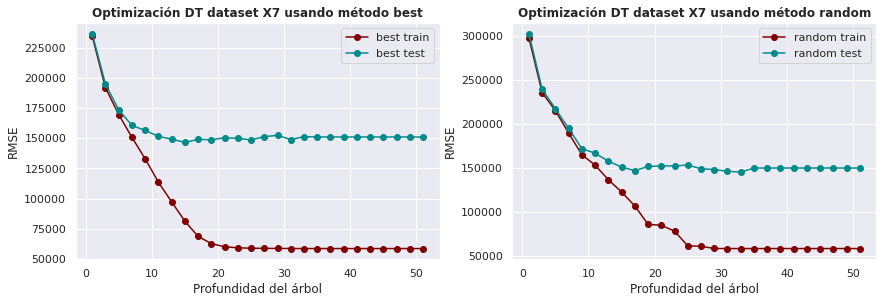

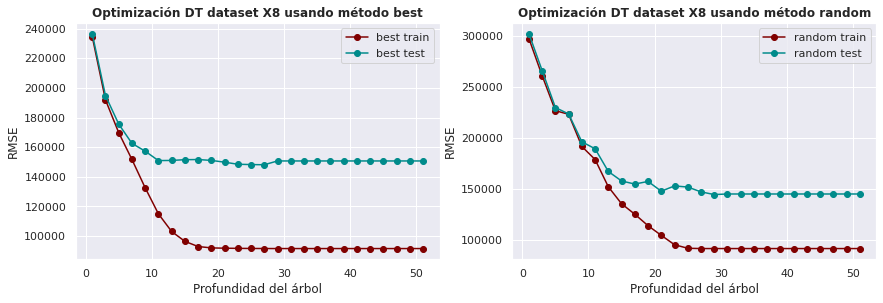

In [ ]:
x = 1
DT_dict = {"Modelo": [], "Metrica":[], "Features":[]}
for i, dset in enumerate(lista_datasets_train_):

  X_train = lista_datasets_train_[i]
  X_test = lista_datasets_test_[i]
  features = datasets[i].columns

  plt.figure(figsize=(30, 20))
  for d, split in enumerate(splitter):
    metrica_train = X_train[d]
    metrica_test = X_test[d]

    DT_dict["Modelo"].append(f"X{i + 1}")
    DT_dict["Metrica"].append(split)
    DT_dict["Features"].append(list(features))


    plt.subplot(4, 4, x)
    plt.plot(max_depths, metrica_train, "o-", label=f"{split} train", c = "maroon" )
    plt.plot(max_depths, metrica_test,'o-',label=f"{split} test", c = "darkcyan")
    plt.legend()
    plt.xlabel("Profundidad del árbol")
    plt.ylabel("RMSE")
    plt.title(f"Optimización DT dataset X{i + 1} usando método {split}", fontsize = "medium", fontweight = "semibold")

    x += 1

A partir de estos graficos, vemos que `max_depth = 11` y `splitter = "best"` son los hiperparámetros que generan la mejor predicción del precio de los features en general. 

A continuación evaluamos el modelo que, a nuestro criterio, es el mejor en términos de eficiencia y poder de predicción para generalizar.

### 3.4.2 Análisis del árbol de profundidad 11 usando los features del dataset X4

A nuestro criterio, el modelo que mejor predice el bien de los inmuebles es el de DT  con `max_depth = 11` y `splitter = "best"`. Este es el modelo que minimiza los `RMSE` tanto para train como para test sin que el modelo se aprenda "de memoria" los datos y haga que se pierda poder de generalización (es decir, no genera sobreajuste).

In [ ]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(max_depth = 11, random_state = 42)

In [ ]:
# Separamos features y etiquetas para modelo benchmark 
from sklearn.model_selection import train_test_split
X = df.drop(columns = ["rooms", "surface_total", "price"])
y = df[["price"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=11,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

In [ ]:
y_train = y_train.to_numpy() 
y_test = y_test.to_numpy()

Raíz del error cuadrático medio en Train: 123783.81612565256
Raíz del error cuadrático medio en Test: 150099.83857459266


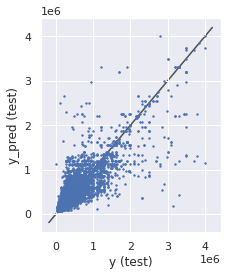

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

En este gráfico vemos como el modelo de DT con parámetros optimizados mejora la precisión de predicción, respecto al modelo de DT sin optimización de parámetros. Esto es, encontramos mayor concentración de puntos a lo largo de la diagonal.

# 4. ¿Cuál modelo elegir?

## Análisis de resultados

A continuación presentamos distintos Dataframes que resumen nuestros hallazgos:

### Resultados Regresión Lineal

In [ ]:
reg_df

,Features,Train,Test
Modelo,,,
X1,"[rooms, bedrooms, bathrooms, surface_total, su...",199173.83,202449.37
X2,"[rooms, bedrooms, bathrooms, surface_total]",199596.13,202260.73
X3,"[rooms, bathrooms, surface_total]",201136.20,204178.13
X4,"[bedrooms, bathrooms, surface_covered]",224281.77,232344.96
X5,"[rooms, bedrooms, bathrooms, surface_total]",199596.13,202260.73
X6,"[rooms, bathrooms, surface_total, surface_cove...",200714.44,204376.20
X7,"[bedrooms, bathrooms, surface_total, surface_c...",199249.99,202634.10
X8,"[rooms, bedrooms, bathrooms, surface_covered]",221944.71,229099.88


### Resultados KNN

In [ ]:
# Dataframe resultados KNN 
KNN_df = pd.DataFrame(KNN_dict)
KNN_df.set_index("Modelo", inplace = True)

# Dataframe resultados DT

performance_dict = {"Train": [lista_datasets_train_[0][0][4], lista_datasets_train_[0][1][7], lista_datasets_train_[1][0][5], 
                              lista_datasets_train_[1][0][8], lista_datasets_train_[2][0][6], lista_datasets_train_[2][0][5], 
                              lista_datasets_train_[3][0][5], lista_datasets_train_[3][0][6], lista_datasets_train_[4][0][5], 
                              lista_datasets_train_[4][0][7], lista_datasets_train_[5][0][4], lista_datasets_train_[5][0][7],
                              lista_datasets_train_[6][0][4], lista_datasets_train_[6][0][7], lista_datasets_train_[7][0][4],
                              lista_datasets_train_[7][0][6]], "Test":[lista_datasets_test_[0][0][4], lista_datasets_test_[0][1][7], lista_datasets_test_[1][0][5], 
                              lista_datasets_test_[1][0][8], lista_datasets_test_[2][0][6], lista_datasets_test_[2][0][5], 
                              lista_datasets_test_[3][0][5], lista_datasets_test_[3][0][6], lista_datasets_test_[4][0][5], 
                              lista_datasets_test_[4][0][7], lista_datasets_test_[5][0][4], lista_datasets_test_[5][0][7],
                              lista_datasets_test_[6][0][4], lista_datasets_test_[6][0][7], lista_datasets_test_[7][0][4],
                              lista_datasets_test_[7][0][6]], "Produndidad del árbol": [9, 15, 11, 17, 13, 11, 11, 13, 11, 15, 9, 15, 9, 15, 9, 13]}


DT_dict = {**DT_dict, **performance_dict}
DT_df = pd.DataFrame(DT_dict)
DT_df["Train"] = round(DT_df["Train"], 2)
DT_df["Test"] = round(DT_df["Test"], 2)
DT_df.set_index("Modelo", inplace = True)
KNN_df

,Metrica,Features,Train,Test,Vecinos
Modelo,,,,,
X1,euclidean,"[rooms, bedrooms, bathrooms, surface_total, su...",114297.26,153695.15,3
X1,manhattan,"[rooms, bedrooms, bathrooms, surface_total, su...",113269.76,152516.69,3
X1,chebyshev,"[rooms, bedrooms, bathrooms, surface_total, su...",116140.13,156079.20,3
X1,minkowski,"[rooms, bedrooms, bathrooms, surface_total, su...",114297.26,153695.15,3
X2,euclidean,"[rooms, bedrooms, bathrooms, surface_total]",136529.73,168466.41,3
X2,manhattan,"[rooms, bedrooms, bathrooms, surface_total]",136615.06,168389.42,3
X2,chebyshev,"[rooms, bedrooms, bathrooms, surface_total]",138024.07,170408.22,3
X2,minkowski,"[rooms, bedrooms, bathrooms, surface_total]",136529.73,168466.41,3
X3,euclidean,"[rooms, bathrooms, surface_total]",140482.00,170804.44,3


En este dataframe podemos ver que el dataset `X1` es el que genera menores `RMSE` tanto para train como para test sin que exista sobreajuste. 

### Resultados DT

In [ ]:
DT_df

,Metrica,Features,Train,Test,Produndidad del árbol
Modelo,,,,,
X1,best,"[rooms, bedrooms, bathrooms, surface_total, su...",129685.36,154597.73,9
X1,random,"[rooms, bedrooms, bathrooms, surface_total, su...",115569.33,153550.79,15
X2,best,"[rooms, bedrooms, bathrooms, surface_total]",135459.48,159072.82,11
X2,random,"[rooms, bedrooms, bathrooms, surface_total]",99583.54,155590.29,17
X3,best,"[rooms, bathrooms, surface_total]",124708.30,158961.71,13
X3,random,"[rooms, bathrooms, surface_total]",136951.75,162518.21,11
X4,best,"[bedrooms, bathrooms, surface_covered]",123783.82,150099.84,11
X4,random,"[bedrooms, bathrooms, surface_covered]",113124.52,151166.09,13
X5,best,"[rooms, bedrooms, bathrooms, surface_total]",135459.48,159072.82,11


En el dataframe de los resultados de los modelos de DT vemos que hay modelos que generan un menor `RMSE` que el `X4` con `max_depth = 11` y `splitter = "best"`. Sin embargo, los errores de train de estos modelos son mucho menores que los errores de train de `X4` lo cual puede indicar que el modelo se está aprendiendo de memoria sus datos y está perdiendo poder de generalización (sobreajuste).

### Resultados generales

In [ ]:
resultados = {"Modelo": list(reg_df.index),
              "Algoritmo": [ "KNN", "DT","DT","DT","DT","KNN","DT","KNN"], 
              "Hiperparámetros":["3 vecinos", "Produndidad 11","Produndidad 11","Produndidad 11","Produndidad 11", "3 vecinos", "Produndidad 11", "3 vecinos"],
              
              "Métrica": ["Manhattan","Best", "Best","Best","Best","Manhattan","Best","Manhattan"],
              "# Variables": ["6", "4", "3", "3", "4", "5", "5", "4"], 
              "RMSE":["Train:113269.76, Test:152516.69","Train:135459.48, Test:159072.82", "Train:124708.30, Test:158961.71", 
                      "Train:123783.82, Test:150099.84","Train:135459.48, Test:159072.82", 
                      "Train:114024.50, Test:152525.87", "Train:132906.43, Test:156460.23",
                      "Train:127913.88, Test:163297.61"]}

resultados_df = pd.DataFrame(resultados)
resultados_df.set_index("Modelo", inplace=True)

resultados_df

,Algoritmo,Hiperparámetros,Métrica,# Variables,RMSE
Modelo,,,,,
X1,KNN,3 vecinos,Manhattan,6,"Train:113269.76, Test:152516.69"
X2,DT,Produndidad 11,Best,4,"Train:135459.48, Test:159072.82"
X3,DT,Produndidad 11,Best,3,"Train:124708.30, Test:158961.71"
X4,DT,Produndidad 11,Best,3,"Train:123783.82, Test:150099.84"
X5,DT,Produndidad 11,Best,4,"Train:135459.48, Test:159072.82"
X6,KNN,3 vecinos,Manhattan,5,"Train:114024.50, Test:152525.87"
X7,DT,Produndidad 11,Best,5,"Train:132906.43, Test:156460.23"
X8,KNN,3 vecinos,Manhattan,4,"Train:127913.88, Test:163297.61"


A partir de este Dataframe, elegimos los mejores modelos para cade set de variables posible (X1 a X8) comparando nuestros resultados para los algoritmos regresión lineal, KNN y  DT. Se aprecia que los modelos con optimización de parámetros son mejores que los respectivos modelos benchmark (regresión lineal no quedó seleccionado en ningún caso).

Teniendo estos resultados en cuenta, **elegimos nuestro modelo `DT`**  con `metric = "best"` y `max_depth = 11` entre todos los "mejores" modelos porque es el que genera menores `RMSE` sin generar sobreajuste (respecto a los otros modelos). 

A propósitio de la elección de nuestra métrica `RMSE`, el modelo `DT` `X4` elegido, es el que garantiza mayor precisión en cuanto a distribución de los errores se refiere.

Vale la pena resaltar que, aunque este modelo presenta el mejor desempeño de todos los que evaluamos, puede no ser el mejor posible: algunos features utilzados en el dataset `X4` pueden estar aportando información redundate al modelo.

Por ejemplo, puede existir una relación más significativa entre las variables `bedrooms` y `bathrooms` que la que vimos en nuestro análisis de correlación. Intuitivamente a medida que aumenta el número de habitaciones/cuartos en un inmueble, aumenta el número de baños para satisfacer la demanda de residentes de cada habitación/cuarto.

Por otro lado, podríamos mejorar el desempeño del modelo si hacemos uso de su ubicación geoespacial, es decir de las variables `lat` y `lon` respecto a lugares de interés: el metro, centros comerciales, centros históricos, etc..

De esta forma, estaríamos aprovechando la variación en ubicación de cada una de las instancias para identificar con mayor precisión el precio del inmueble.